# **Industrial Pump Performance Analysis - EDA Report**

### **Executive Summary**

*This report presents a comprehensive exploratory data analysis (EDA) of industrial pump operations, examining sensor data from 50 pump units over several weeks of continuous operation. The analysis reveals critical patterns in operational parameters that precede pump failures, enabling the development of predictive maintenance strategies. Key findings include the identification of vibration and temperature thresholds that serve as early warning indicators, significant reliability variations across pump units, and actionable insights for optimizing maintenance schedules.*

### **INTRODUCTION**

### **1.1 Background and Context**
Industrial pumps serve as critical components in manufacturing operations, chemical processing facilities, and water treatment plants worldwide. These mechanical systems operate continuously under demanding conditions, processing thousands of cubic meters of fluid daily while maintaining precise pressure and flow requirements. Unexpected pump failures can cascade into:

**Operational Disruptions:** Complete production line shutdowns affecting downstream processes
Safety Hazards: Potential for equipment damage, environmental releases, or personnel injury
Financial Losses: Emergency repairs, production losses, and regulatory penalties
Supply Chain Impact: Delayed deliveries and customer dissatisfaction

Modern sensor technologies have revolutionized pump monitoring capabilities, enabling continuous tracking of critical parameters including throughput, pressure, vibration, and bearing temperature. However, the challenge lies not in data collection but in transforming these vast streams of sensor readings into actionable maintenance insights.

### **1.2 Problem Statement**
Traditional maintenance strategies fall into two categories, both with significant limitations:
Reactive Maintenance: Repairs are performed only after equipment failure occurs, leading to unplanned downtime, emergency repair costs, and potential safety incidents.

**Scheduled Maintenance:** Fixed-interval servicing based on calendar time or operating hours, often resulting in unnecessary maintenance of healthy equipment or missed maintenance of deteriorating systems.

The industry needs a predictive maintenance approach that uses real-time sensor data to predict failures before they occur, optimizing maintenance timing based on actual equipment condition rather than arbitrary schedules.

### **INSPIRATION**

*The motivation for this analysis stems from the need to shift from reactive to predictive maintenance approaches. Traditional maintenance strategies often rely on fixed schedules or basic alarm thresholds that trigger after problems have already developed. By analyzing operational patterns in sensor data, we can identify subtle indicators of impending failures and optimize maintenance schedules based on actual equipment condition rather than arbitrary time intervals.*

### **GOAL**

*Examine the operational performance of industrial pumps through exploratory data analysis to identify patterns associated with pump failures, assess reliability across different units, and detect operational anomalies that require immediate attention.*

### **Research Questions:**


1.   Are there any noticeable operational patterns (temperature, pressure, vibration, etc.) and efficiency trends over time associated with impending pump failure?
2.  What is the reliability and uptime performance across different pump units?

3. What operational anomalies require immediate attention?

4. Define data-driven alarm levels for predictive maintenance

### **2. Data Overview and Initial Exploration**

**2.1 Dataset Characteristics**

Our analysis examines a comprehensive dataset of industrial pump operations collected through automated sensor systems. Let's begin by loading and examining the fundamental structure of this data.

In [1]:
# Library imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
from scipy.stats.mstats import winsorize
warnings.filterwarnings('ignore')

# Configure plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Data loading from Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
from gspread_dataframe import get_as_dataframe

creds, _ = default()
gc = gspread.authorize(creds)

sheet_url = "https://docs.google.com/spreadsheets/d/1FdYNeJc8c9maejrMqLm8i6GUF03mm0ZevwbjnnJNLfw/edit?usp=sharing"
sh = gc.open_by_url(sheet_url)
worksheet = sh.get_worksheet(0)
df = get_as_dataframe(worksheet, evaluate_formulas=True)

# Clean empty rows and columns
df = df.dropna(how="all").dropna(axis=1, how="all")
df['timestamp'] = pd.to_datetime(df['timestamp'])

print("="*60)
print("INDUSTRIAL PUMP PERFORMANCE ANALYSIS")
print("="*60)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*60)

INDUSTRIAL PUMP PERFORMANCE ANALYSIS
Analysis Date: 2025-09-21 19:20:32


#### **2.2 Initial Data Examination**

**Question:** What is the structure and quality of our pump monitoring data?

Understanding our dataset's fundamental characteristics is crucial before diving into analysis. Let's examine the data dimensions, types, and overall quality.

In [2]:
print("\n" + "="*40)
print("DATASET OVERVIEW")
print("="*40)

# Dataset dimensions
rows, columns = df.shape
print(f"Dataset Dimensions: {rows:,} records × {columns} variables")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Column information
print(f"\nColumn Overview:")
for i, (col, dtype) in enumerate(df.dtypes.items(), 1):
    print(f"{i:2d}. {col:<25} ({dtype})")

# Basic data preview
print(f"\nFirst 5 Records:")
print(df.head())

# Summary statistics
print(f"\nSummary Statistics:")
print(df.describe())


DATASET OVERVIEW
Dataset Dimensions: 720,050 records × 7 variables
Memory Usage: 76.77 MB

Column Overview:
 1. timestamp                 (datetime64[ns])
 2. pump_throughput_m3ph      (float64)
 3. operating_pressure_bar    (float64)
 4. vibration_mm_s            (float64)
 5. bearing_temp_C            (float64)
 6. status                    (object)
 7. pump_number               (float64)

First 5 Records:
            timestamp  pump_throughput_m3ph  operating_pressure_bar  \
0 2025-04-15 20:14:00            101.948189                9.911733   
1 2025-04-15 20:24:00             97.350999               10.015090   
2 2025-04-15 20:34:00             98.642862                9.890661   
3 2025-04-15 20:44:00            101.125591               10.136244   
4 2025-04-15 20:54:00            102.167705               10.048706   

   vibration_mm_s  bearing_temp_C   status  pump_number  
0        1.151807       63.317134  RUNNING          1.0  
1        1.222389       67.622323  RUNNING  

#### **2.3 Data Quality Assessment**

**Question:** Are there any data quality issues that could impact our analysis?

Data quality directly affects the reliability of our insights. We need to examine missing values, duplicates, and data consistency patterns.

In [3]:
print("----- Dataset Shape -----")
print(df.shape)

print("\n----- Column Names -----")
print(df.columns.tolist())

print("\n----- Data Types -----")
print(df.dtypes)

print("\n----- Missing Values per Column -----")
print(df.isnull().sum())

print("\n----- Duplicate Rows -----")
print(df.duplicated().sum())

print("\n----- Unique Values per Column -----")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

if "status" in df.columns:
    print("\n----- Status Value Counts -----")
    print(df['status'].value_counts())

if "pump_number" in df.columns:
    print("\n----- Pump Count -----")
    print(df['pump_number'].nunique())

print("\n----- Basic Statistics (Numerical Columns) -----")
print(df.describe())

print("\n----- Sample Records -----")
print(df.head())

----- Dataset Shape -----
(720050, 7)

----- Column Names -----
['timestamp', 'pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C', 'status', 'pump_number']

----- Data Types -----
timestamp                 datetime64[ns]
pump_throughput_m3ph             float64
operating_pressure_bar           float64
vibration_mm_s                   float64
bearing_temp_C                   float64
status                            object
pump_number                      float64
dtype: object

----- Missing Values per Column -----
timestamp                 0
pump_throughput_m3ph      0
operating_pressure_bar    0
vibration_mm_s            0
bearing_temp_C            0
status                    0
pump_number               0
dtype: int64

----- Duplicate Rows -----
0

----- Unique Values per Column -----
timestamp: 14401 unique values
pump_throughput_m3ph: 671601 unique values
operating_pressure_bar: 671601 unique values
vibration_mm_s: 671555 unique values
bearing_temp_C

### **3. Data Preprocessing and Cleaning**

#### **3.1 Handling Data Quality Issues**

**Question:** How should we address missing values and outliers to ensure robust analysis?

Even high-quality industrial datasets can contain sensor malfunctions, communication errors, or extreme operating conditions. Our preprocessing strategy must balance data integrity with analytical needs.


In [26]:
# Makes sure that there are no null values in the dataset and if there are, fills with average of the column
print("----Number of Missing/Null Values Check----")
print(df.isnull().sum().sum())
print(df.isnull().values.any())
df = df.fillna(df.mean(numeric_only=True))

# Winsorize selected numeric features
for col in ['pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C']:
    # winsorize takes proportions to cut off (not quantiles directly)
    df[col] = winsorize(df[col], limits=[0.01, 0.01])  # 1% lower, 1% upper

# Verify outliers after winsorizing
print("\n----- Outliers after winsorizing -----")
numeric_features = ['pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C']
for col in numeric_features:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    n_out = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col:<30}: {n_out:>6,}")

----Number of Missing/Null Values Check----
0
False

----- Outliers after winsorizing -----
pump_throughput_m3ph          : 49,176
operating_pressure_bar        : 51,256
vibration_mm_s                : 49,187
bearing_temp_C                : 49,233


#### **3.2 Data Export for Reproducibility**

In [5]:
# Export cleaned dataset
df.to_csv('cleaned_pump_data.csv', index=False)
print("\n✓ Cleaned data exported to 'cleaned_pump_data.csv'")

# For Google Colab users
from google.colab import files
files.download('cleaned_pump_data.csv')


✓ Cleaned data exported to 'cleaned_pump_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **4. Comprehensive Statistical Analysis**

#### **4.1 Distribution Analysis of Key Parameters**

**Question:** What do the distributions of our key operational parameters tell us about normal pump behavior?

Understanding the natural distribution of each parameter helps us identify what constitutes "normal" operation versus potential anomalies.


STATISTICAL DISTRIBUTION ANALYSIS
Comprehensive Statistical Summary:
       pump_throughput_m3ph  operating_pressure_bar  vibration_mm_s  \
count             720050.00               720050.00       720050.00   
mean                  93.15                    9.13            1.24   
std                   25.23                    2.50            0.47   
min                    0.00                    0.00            0.00   
1%                     0.00                    0.00            0.00   
5%                     0.00                    0.00            0.00   
25%                   96.97                    9.38            1.04   
50%                   99.57                    9.77            1.29   
75%                  101.98                   10.09            1.54   
95%                  105.36                   10.54            1.91   
99%                  107.72                   10.86            2.20   
max                  107.72                   10.86            2.20   

      

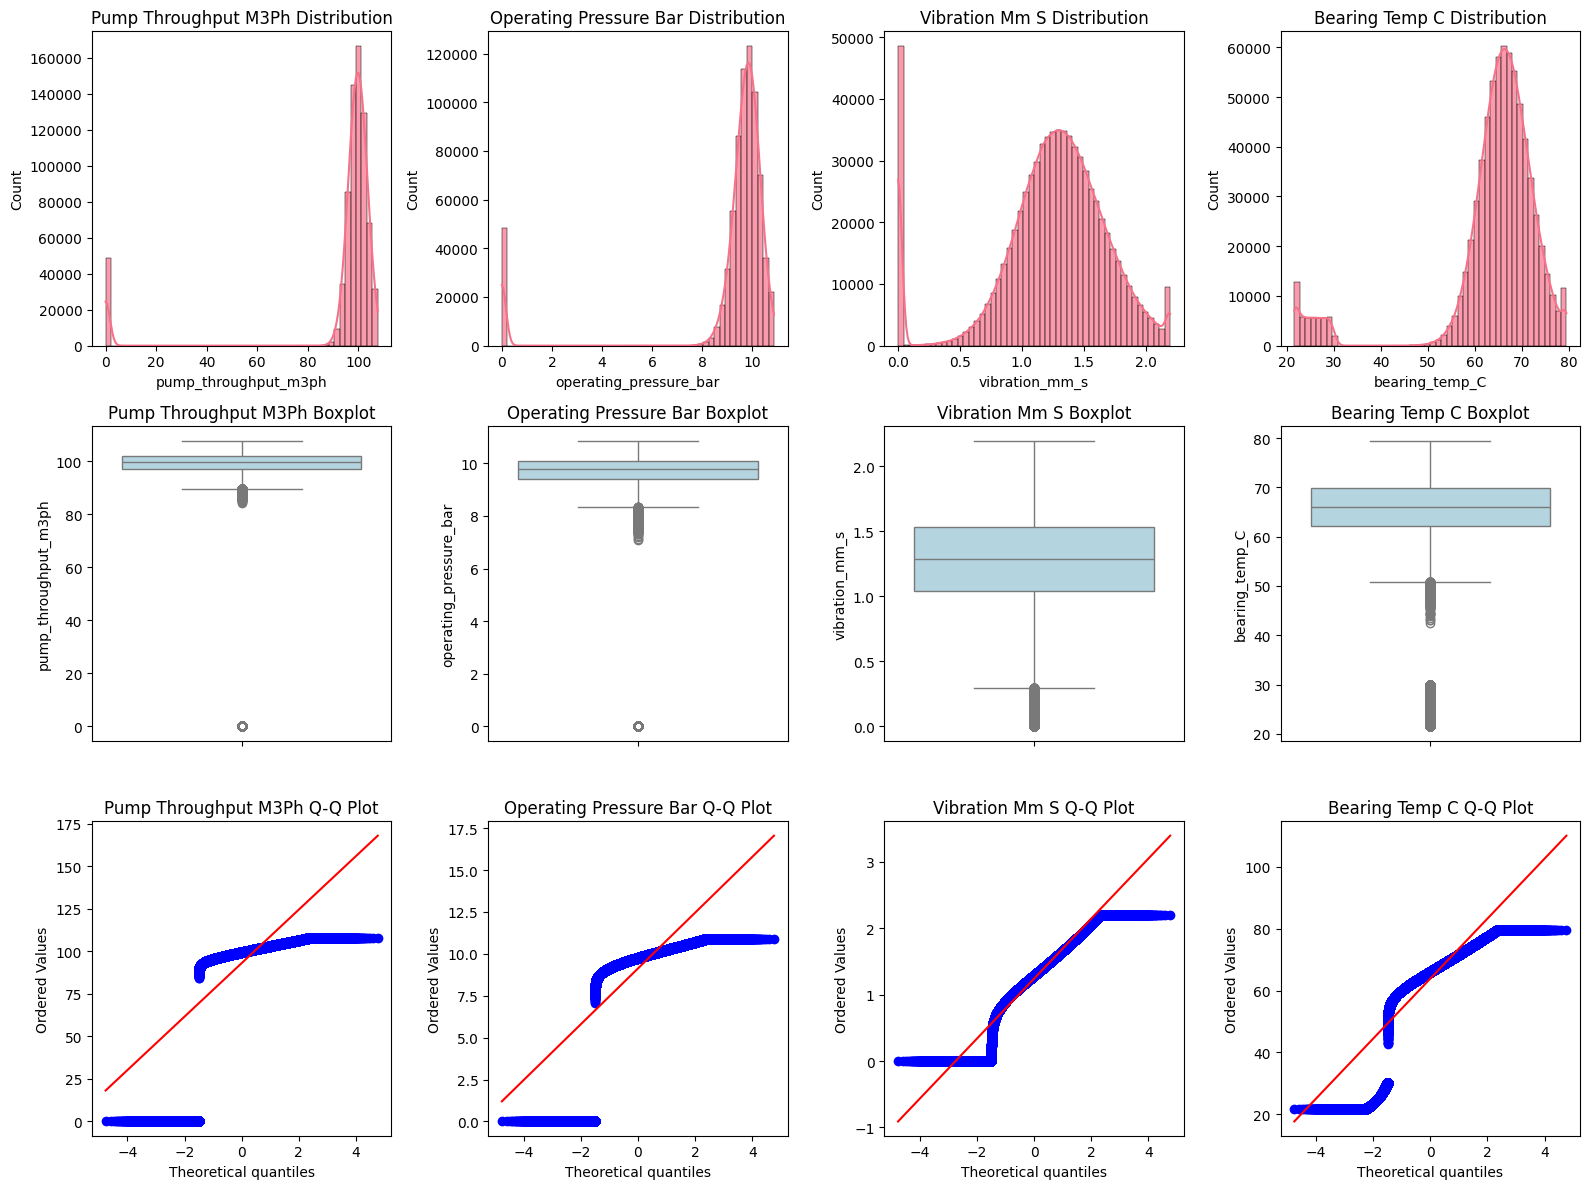

In [6]:
print("\n" + "="*40)
print("STATISTICAL DISTRIBUTION ANALYSIS")
print("="*40)

# Detailed descriptive statistics
features = ['pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C']
if all(col in df.columns for col in features):
    stats_summary = df[features].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
    print("Comprehensive Statistical Summary:")
    print(stats_summary.round(2))

    # Distribution visualization
    plt.figure(figsize=(16, 12))

    for idx, col in enumerate(features, 1):
        # Histogram with KDE
        plt.subplot(3, 4, idx)
        sns.histplot(df[col], bins=50, kde=True, alpha=0.7)
        plt.title(f'{col.replace("_", " ").title()} Distribution')
        plt.xlabel(col)

        # Box plot
        plt.subplot(3, 4, idx + 4)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(f'{col.replace("_", " ").title()} Boxplot')

        # Q-Q plot for normality assessment
        plt.subplot(3, 4, idx + 8)
        from scipy import stats
        stats.probplot(df[col], dist="norm", plot=plt)
        plt.title(f'{col.replace("_", " ").title()} Q-Q Plot')

    plt.tight_layout()
    plt.savefig('distribution_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

#### **4.2 Parameter Relationships and Correlations**

**Question:** How do the different operational parameters relate to each other?

Understanding parameter relationships helps identify which sensors provide redundant information versus unique insights, and reveals the mechanical relationships within the pump system.


PARAMETER CORRELATION ANALYSIS
Correlation Matrix:
                        pump_throughput_m3ph  operating_pressure_bar  \
pump_throughput_m3ph                   1.000                   0.974   
operating_pressure_bar                 0.974                   1.000   
vibration_mm_s                         0.704                   0.688   
bearing_temp_C                         0.891                   0.878   

                        vibration_mm_s  bearing_temp_C  
pump_throughput_m3ph             0.704           0.891  
operating_pressure_bar           0.688           0.878  
vibration_mm_s                   1.000           0.653  
bearing_temp_C                   0.653           1.000  


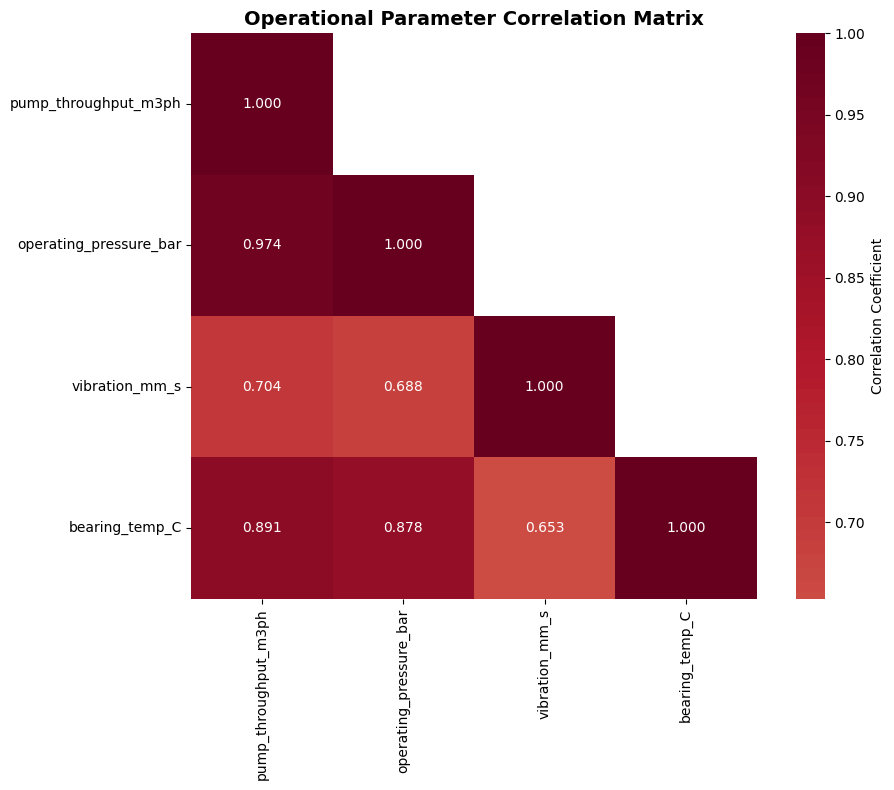


Strong Correlations (|r| > 0.5):
  pump_throughput_m3ph ↔ operating_pressure_bar: r = 0.974 (Strong Positive)
  pump_throughput_m3ph ↔ vibration_mm_s: r = 0.704 (Strong Positive)
  pump_throughput_m3ph ↔ bearing_temp_C: r = 0.891 (Strong Positive)
  operating_pressure_bar ↔ vibration_mm_s: r = 0.688 (Strong Positive)
  operating_pressure_bar ↔ bearing_temp_C: r = 0.878 (Strong Positive)
  vibration_mm_s ↔ bearing_temp_C: r = 0.653 (Strong Positive)


In [7]:
# Correlation analysis
print("\n" + "="*40)
print("PARAMETER CORRELATION ANALYSIS")
print("="*40)

if len(features) > 1:
    correlation_matrix = df[features].corr()
    print("Correlation Matrix:")
    print(correlation_matrix.round(3))

    # Enhanced correlation heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='RdBu_r',
                center=0,
                square=True,
                mask=mask,
                fmt='.3f',
                cbar_kws={'label': 'Correlation Coefficient'})

    plt.title('Operational Parameter Correlation Matrix', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Identify strong correlations
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_correlations.append({
                    'Parameter 1': correlation_matrix.columns[i],
                    'Parameter 2': correlation_matrix.columns[j],
                    'Correlation': corr_val,
                    'Interpretation': 'Strong Positive' if corr_val > 0.5 else 'Strong Negative'
                })

    if strong_correlations:
        print(f"\nStrong Correlations (|r| > 0.5):")
        strong_corr_df = pd.DataFrame(strong_correlations)
        for _, row in strong_corr_df.iterrows():
            print(f"  {row['Parameter 1']} ↔ {row['Parameter 2']}: r = {row['Correlation']:.3f} ({row['Interpretation']})")

#### **4.3 Temporal Patterns Analysis**

**Question:** Are there time-based patterns in our operational data that could indicate systematic behaviors or maintenance cycles?

Industrial equipment often exhibits cyclical patterns related to production schedules, seasonal variations, or maintenance routines.


TEMPORAL PATTERN ANALYSIS
Data Collection Period:
  Start: 2025-04-15 20:14:00
  End: 2025-07-24 20:14:00
  Duration: 100 days, 0 hours
  Total records: 720,050
  Average sampling rate: 5.0 records/minute


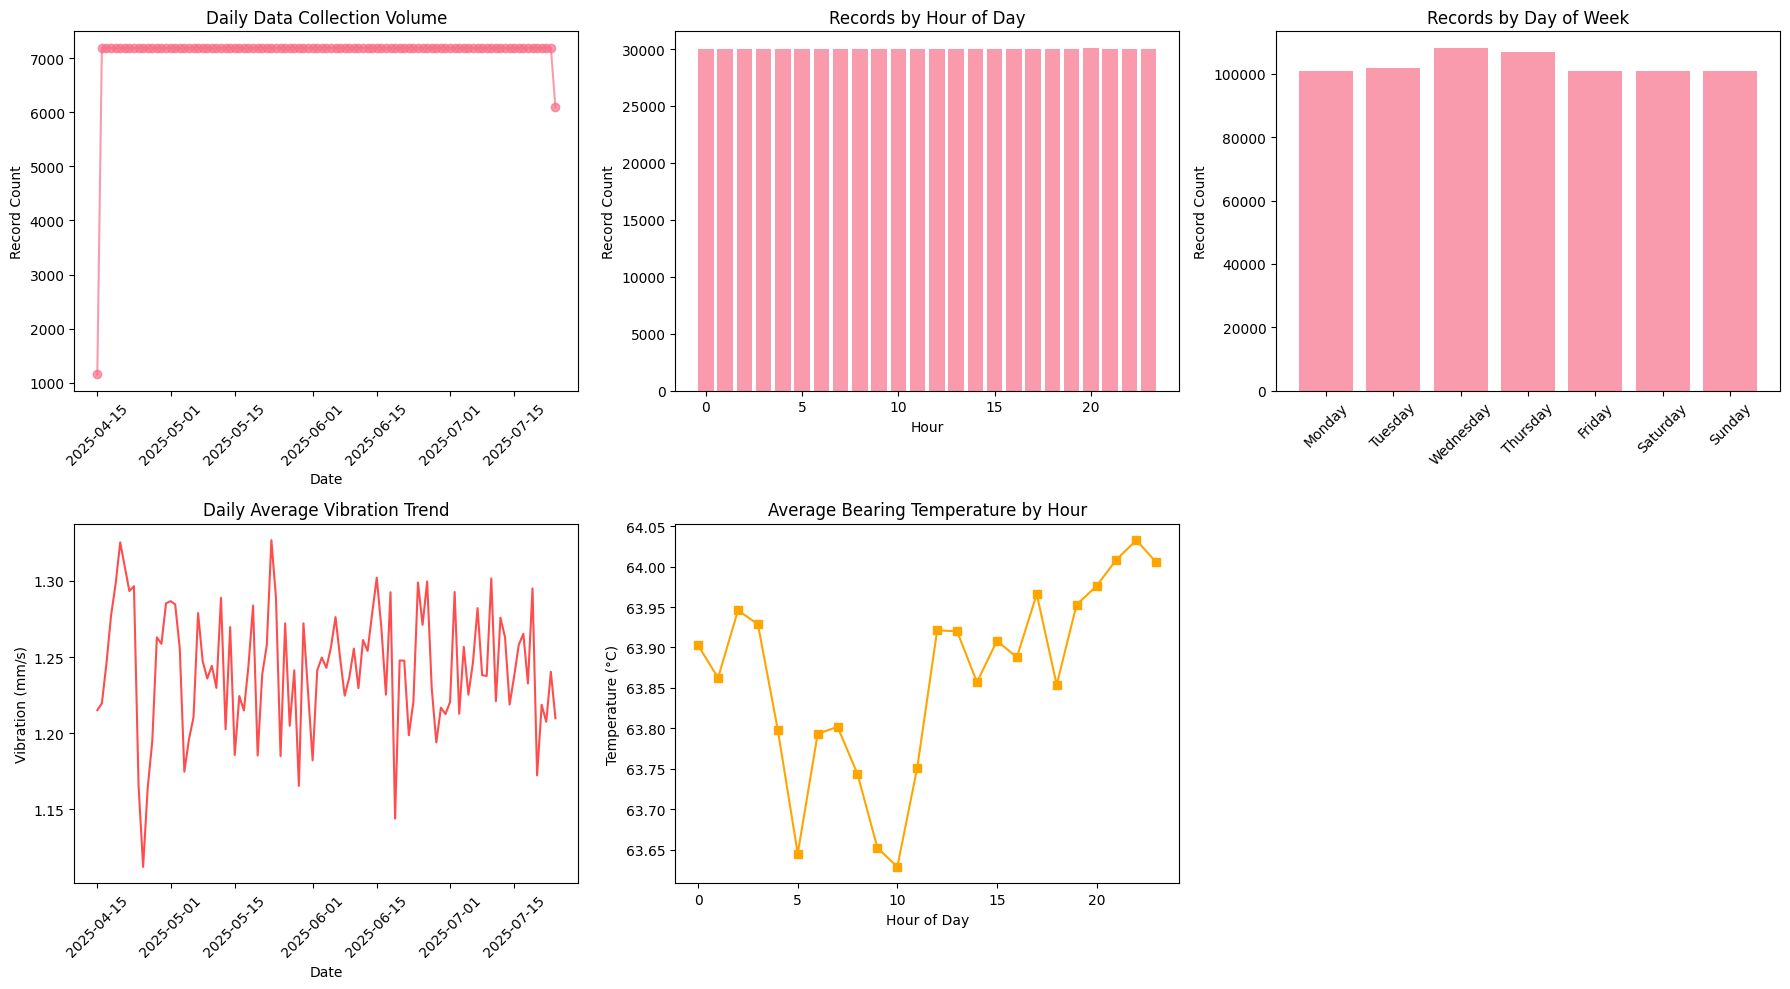

In [8]:
print("\n" + "="*40)
print("TEMPORAL PATTERN ANALYSIS")
print("="*40)

if 'timestamp' in df.columns:
    # Time span analysis
    time_span = df['timestamp'].max() - df['timestamp'].min()
    print(f"Data Collection Period:")
    print(f"  Start: {df['timestamp'].min()}")
    print(f"  End: {df['timestamp'].max()}")
    print(f"  Duration: {time_span.days} days, {time_span.seconds // 3600} hours")
    print(f"  Total records: {len(df):,}")
    print(f"  Average sampling rate: {len(df) / (time_span.total_seconds() / 60):.1f} records/minute")

    # Extract temporal features
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.day_name()
    df['date'] = df['timestamp'].dt.date

    # Temporal distribution analysis
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # Daily record count
    daily_counts = df.groupby('date').size()
    axes[0,0].plot(daily_counts.index, daily_counts.values, marker='o', alpha=0.7)
    axes[0,0].set_title('Daily Data Collection Volume')
    axes[0,0].set_xlabel('Date')
    axes[0,0].set_ylabel('Record Count')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Hourly distribution
    hourly_dist = df['hour'].value_counts().sort_index()
    axes[0,1].bar(hourly_dist.index, hourly_dist.values, alpha=0.7)
    axes[0,1].set_title('Records by Hour of Day')
    axes[0,1].set_xlabel('Hour')
    axes[0,1].set_ylabel('Record Count')

    # Day of week pattern
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_counts = df['day_of_week'].value_counts().reindex(days_order)
    axes[0,2].bar(range(len(dow_counts)), dow_counts.values, alpha=0.7)
    axes[0,2].set_xticks(range(len(dow_counts)))
    axes[0,2].set_xticklabels(dow_counts.index, rotation=45)
    axes[0,2].set_title('Records by Day of Week')
    axes[0,2].set_ylabel('Record Count')

    # Parameter trends over time (sample)
    if 'vibration_mm_s' in df.columns:
        # Daily average vibration
        daily_vib = df.groupby('date')['vibration_mm_s'].mean()
        axes[1,0].plot(daily_vib.index, daily_vib.values, color='red', alpha=0.7)
        axes[1,0].set_title('Daily Average Vibration Trend')
        axes[1,0].set_xlabel('Date')
        axes[1,0].set_ylabel('Vibration (mm/s)')
        axes[1,0].tick_params(axis='x', rotation=45)

    # Hourly parameter patterns
    if 'bearing_temp_C' in df.columns:
        hourly_temp = df.groupby('hour')['bearing_temp_C'].mean()
        axes[1,1].plot(hourly_temp.index, hourly_temp.values, marker='s', color='orange')
        axes[1,1].set_title('Average Bearing Temperature by Hour')
        axes[1,1].set_xlabel('Hour of Day')
        axes[1,1].set_ylabel('Temperature (°C)')

    # Remove empty subplot
    axes[1,2].remove()

    plt.tight_layout()
    plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

### **5. Research Question Analysis**

#### **5.1 Research Question 1: Operational Patterns Associated with Pump Failure**

**Primary Question:** Are there noticeable operational patterns (temperature, pressure, vibration, etc.) and efficiency trends over time associated with impending pump failure?

This is perhaps the most critical question for predictive maintenance. We need to understand how sensor readings change in the hours and days leading up to pump failures.


RESEARCH QUESTION 1: FAILURE PATTERN ANALYSIS
Overall Operational Status Distribution:
  RUNNING   :  671,600 records ( 93.3%)
  DOWN      :   48,450 records (  6.7%)


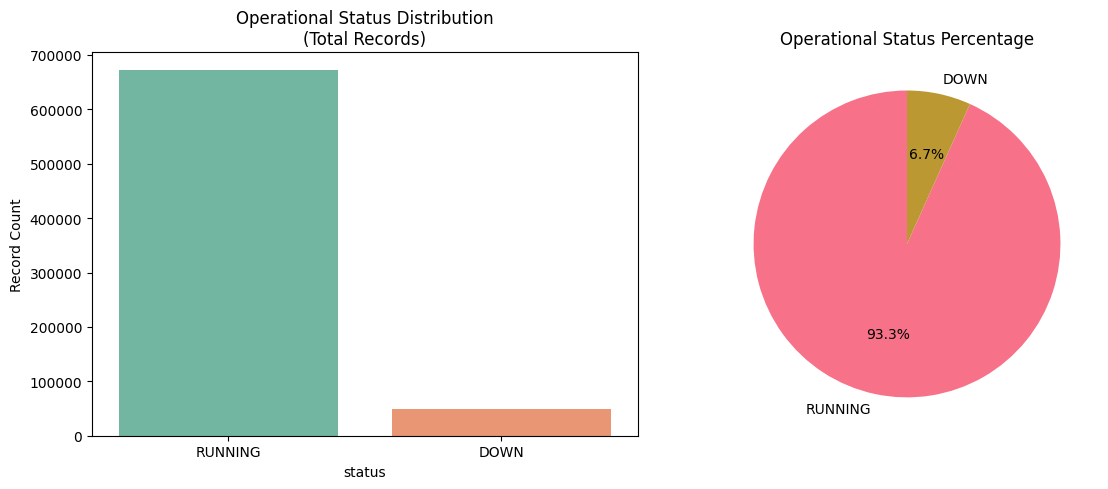


Key Observation: 93.3% of records show RUNNING status, indicating potential class imbalance for failure prediction models.


In [9]:
print("\n" + "="*50)
print("RESEARCH QUESTION 1: FAILURE PATTERN ANALYSIS")
print("="*50)

# First, let's understand the overall status distribution
if 'status' in df.columns:
    status_counts = df['status'].value_counts()
    status_pct = (status_counts / len(df)) * 100

    print("Overall Operational Status Distribution:")
    for status, count in status_counts.items():
        pct = status_pct[status]
        print(f"  {status:<10}: {count:>8,} records ({pct:5.1f}%)")

    # Visualize status distribution
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')
    plt.title('Operational Status Distribution\n(Total Records)')
    plt.ylabel('Record Count')

    plt.subplot(1, 2, 2)
    plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Operational Status Percentage')

    plt.tight_layout()
    plt.show()

    print(f"\nKey Observation: {status_pct.get('RUNNING', 0):.1f}% of records show RUNNING status, indicating potential class imbalance for failure prediction models.")

Sub-question: What are the fleet-level trends that precede failures?

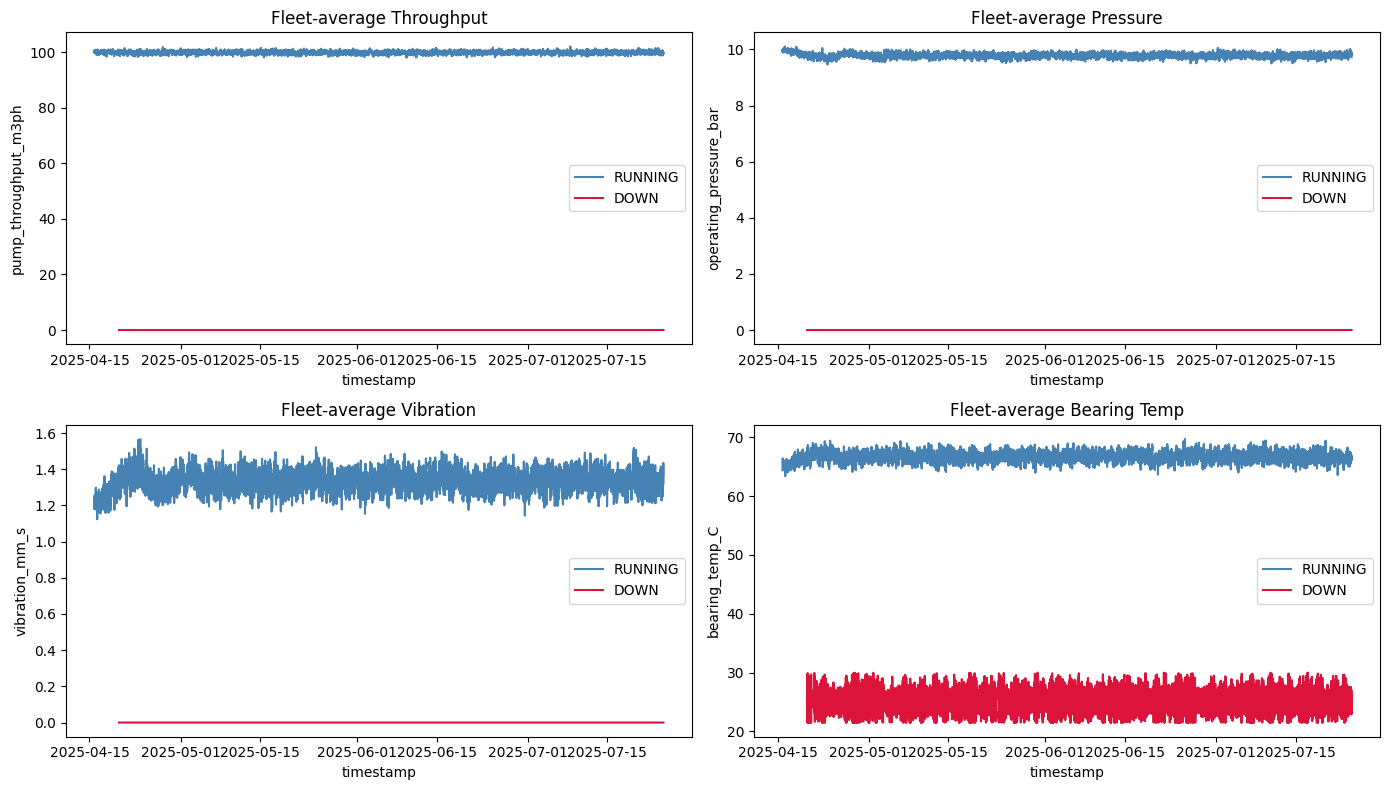

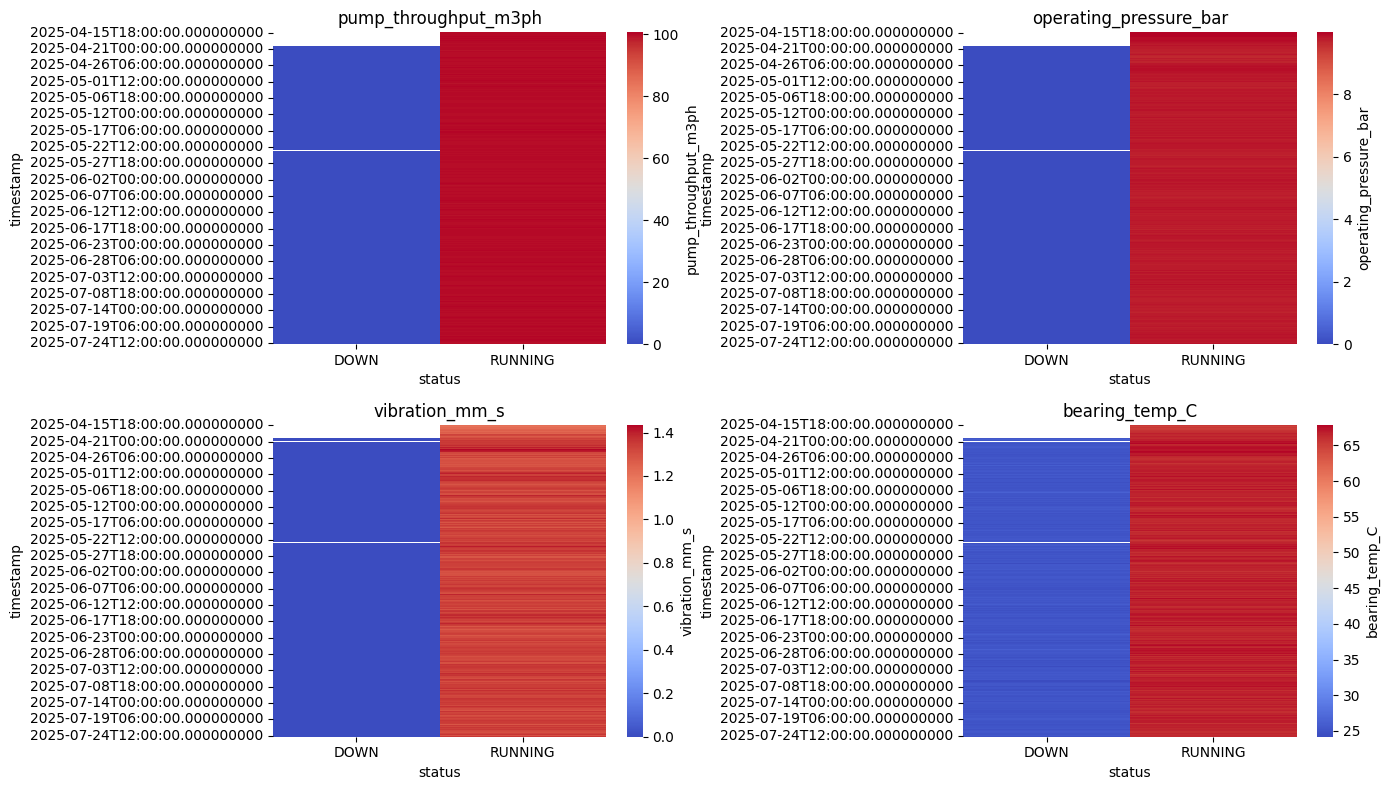

In [10]:
# --- fleet-level trend plots (1 line per status) -----------------
# average **across all pumps** each hour
fleet = (df.groupby(['timestamp','status'])
           .mean(numeric_only=True)          # 50 pumps → 1 value
           .reset_index())

running = fleet[fleet['status'] == 'RUNNING']
down    = fleet[fleet['status'] == 'DOWN']

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
def plot_hr(ax, y_col, title):
    sns.lineplot(data=running, x='timestamp', y=y_col, ax=ax, label='RUNNING', color='steelblue')
    sns.lineplot(data=down,    x='timestamp', y=y_col, ax=ax, label='DOWN',    color='crimson')
    ax.set_title(title)
    ax.legend()

plot_hr(axes[0,0], 'pump_throughput_m3ph', 'Fleet-average Throughput')
plot_hr(axes[0,1], 'operating_pressure_bar', 'Fleet-average Pressure')
plot_hr(axes[1,0], 'vibration_mm_s', 'Fleet-average Vibration')
plot_hr(axes[1,1], 'bearing_temp_C', 'Fleet-average Bearing Temp')
plt.tight_layout()
plt.show()

# --- heat-map: pumps (columns) vs time (rows) --------------
# resample to 6-hour blocks so the plot isn't huge
pivot = (df.set_index('timestamp')
            .groupby('status')
            .resample('6H')
            .mean(numeric_only=True))

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for ax, col in zip(axes.flat, ['pump_throughput_m3ph','operating_pressure_bar',
                               'vibration_mm_s','bearing_temp_C']):
    sns.heatmap(pivot[col].unstack(level=0), cmap='coolwarm', ax=ax, cbar_kws={'label': col})
    ax.set_title(col)
plt.tight_layout()
plt.show()

Sub-question: Can we identify specific failure events and analyze the 24 hours preceding them?

In [11]:
# keep only the **first** DOWN record in each contiguous block
down_events = (df['status']
               .ne(df['status'].shift())   # True where status changes
               & (df['status'] == 'DOWN')) # keep only DOWN changes

failure_stamps = df.loc[down_events, 'timestamp'].sort_values()
print(failure_stamps.to_list())

[Timestamp('2025-04-20 04:24:00'), Timestamp('2025-04-21 08:44:00'), Timestamp('2025-04-21 09:34:00'), Timestamp('2025-04-21 13:54:00'), Timestamp('2025-04-21 15:54:00'), Timestamp('2025-04-22 00:34:00'), Timestamp('2025-04-22 04:24:00'), Timestamp('2025-04-22 08:54:00'), Timestamp('2025-04-23 03:04:00'), Timestamp('2025-04-23 07:04:00'), Timestamp('2025-04-23 07:24:00'), Timestamp('2025-04-23 07:44:00'), Timestamp('2025-04-23 14:34:00'), Timestamp('2025-04-23 14:54:00'), Timestamp('2025-04-23 18:44:00'), Timestamp('2025-04-23 19:24:00'), Timestamp('2025-04-23 21:34:00'), Timestamp('2025-04-24 00:54:00'), Timestamp('2025-04-24 01:14:00'), Timestamp('2025-04-24 04:14:00'), Timestamp('2025-04-24 06:14:00'), Timestamp('2025-04-24 08:24:00'), Timestamp('2025-04-24 10:24:00'), Timestamp('2025-04-24 10:34:00'), Timestamp('2025-04-24 19:34:00'), Timestamp('2025-04-24 21:24:00'), Timestamp('2025-04-25 01:54:00'), Timestamp('2025-04-25 02:14:00'), Timestamp('2025-04-25 02:24:00'), Timestamp('20

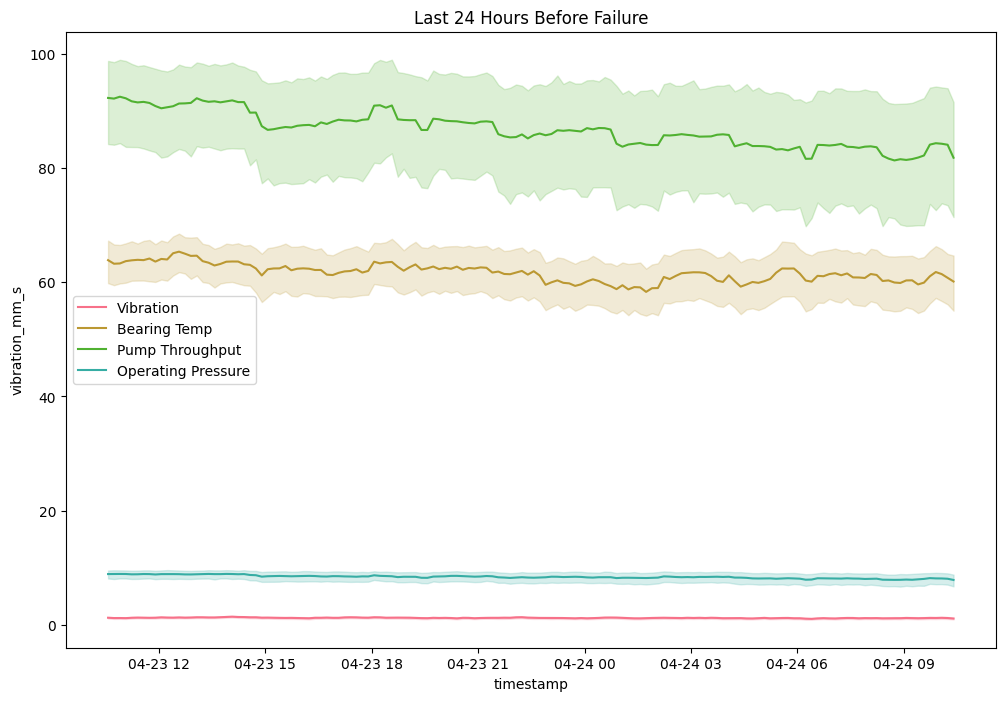

In [12]:
# Focus on last 24 hours before failure
failure_time = pd.to_datetime('2025-04-24 10:34')
pre_failure = df[(df['timestamp'] >= failure_time - pd.Timedelta(hours=24)) & (df['timestamp'] < failure_time)]

down_in_window = pre_failure[pre_failure['status'] == 'DOWN']['timestamp']

sns.lineplot(data=pre_failure, x='timestamp', y='vibration_mm_s', label='Vibration')
sns.lineplot(data=pre_failure, x='timestamp', y='bearing_temp_C', label='Bearing Temp')
sns.lineplot(data=pre_failure, x='timestamp', y='pump_throughput_m3ph', label='Pump Throughput')
sns.lineplot(data=pre_failure, x='timestamp', y='operating_pressure_bar', label='Operating Pressure')
plt.title('Last 24 Hours Before Failure')
plt.legend()
plt.show()

Sub-question: What are the characteristic differences in operational parameters between RUNNING and DOWN states?


Comparative Analysis: RUNNING vs DOWN States
--------------------------------------------------

Parameter Comparison (RUNNING vs DOWN):
                Parameter  RUNNING_Mean  DOWN_Mean  Difference  Pct_Change
0    pump_throughput_m3ph         99.87       0.00      -99.87     -100.00
1  operating_pressure_bar          9.78       0.00       -9.78     -100.00
2          vibration_mm_s          1.33       0.00       -1.33     -100.00
3          bearing_temp_C         66.66      25.11      -41.55      -62.33


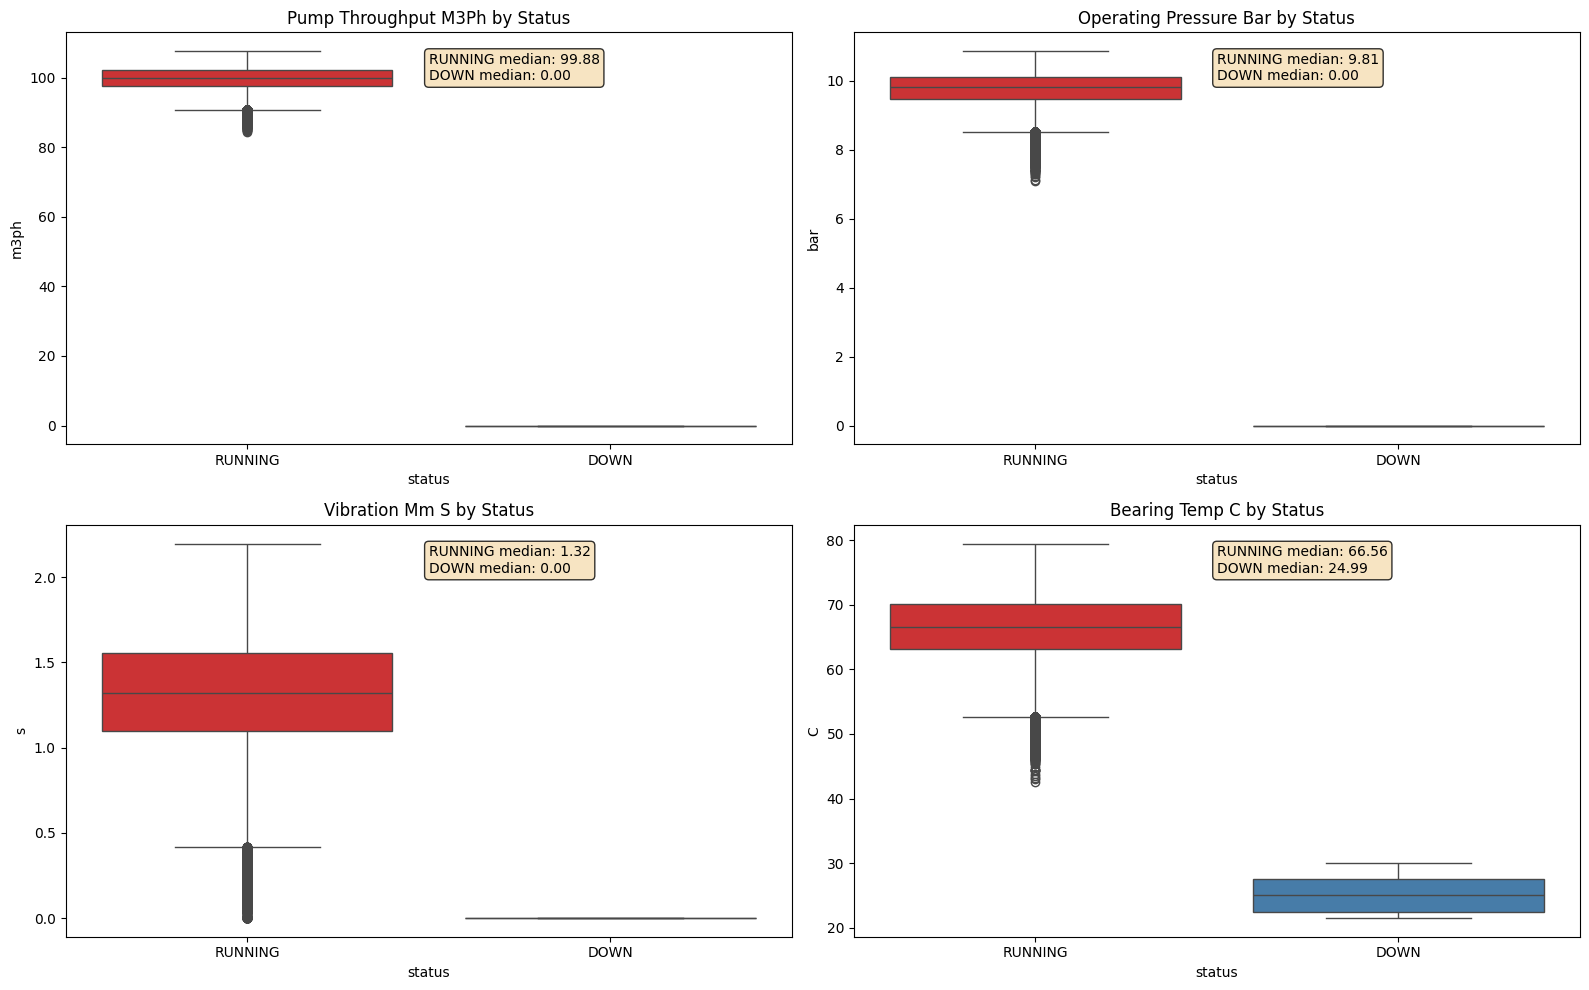

In [13]:
# Comparative analysis between operational states
if 'status' in df.columns and len(df['status'].unique()) > 1:
    print("\nComparative Analysis: RUNNING vs DOWN States")
    print("-" * 50)

    # Statistical comparison
    comparison_features = ['pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C']
    comparison_data = []

    for feature in comparison_features:
        if feature in df.columns:
            running_stats = df[df['status'] == 'RUNNING'][feature].describe()
            down_stats = df[df['status'] == 'DOWN'][feature].describe()

            comparison_data.append({
                'Parameter': feature,
                'RUNNING_Mean': running_stats['mean'],
                'DOWN_Mean': down_stats['mean'],
                'Difference': down_stats['mean'] - running_stats['mean'],
                'Pct_Change': ((down_stats['mean'] - running_stats['mean']) / running_stats['mean']) * 100
            })

    comparison_df = pd.DataFrame(comparison_data)
    print("\nParameter Comparison (RUNNING vs DOWN):")
    print(comparison_df.round(2))

    # Box plot comparison
    plt.figure(figsize=(16, 10))

    plot_features = [f for f in comparison_features if f in df.columns]

    for idx, feature in enumerate(plot_features, 1):
        plt.subplot(2, 2, idx)
        sns.boxplot(data=df, x='status', y=feature, palette='Set1')
        plt.title(f'{feature.replace("_", " ").title()} by Status')
        plt.ylabel(feature.split('_')[-1] if '_' in feature else feature)

        # Add statistical annotation
        running_median = df[df['status'] == 'RUNNING'][feature].median()
        down_median = df[df['status'] == 'DOWN'][feature].median()
        plt.text(0.5, 0.95, f'RUNNING median: {running_median:.2f}\nDOWN median: {down_median:.2f}',
                transform=plt.gca().transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.savefig('status_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

Sub-question: Can we identify specific time periods leading up to failures and analyze the parameter trends?


Failure Event Timeline Analysis
----------------------------------------
Number of failure events detected: 44983
Failure timestamps:
  1. 2025-04-20 04:24:00
  2. 2025-04-20 04:34:00
  3. 2025-04-20 04:44:00
  4. 2025-04-20 04:54:00
  5. 2025-04-20 05:04:00
  6. 2025-04-20 05:14:00
  7. 2025-04-20 05:24:00
  8. 2025-04-20 05:34:00
  9. 2025-04-20 05:44:00
  10. 2025-04-20 05:54:00

Analyzing 24 hours before first failure: 2025-04-20 04:24:00
Records in 24h pre-failure window: 7200


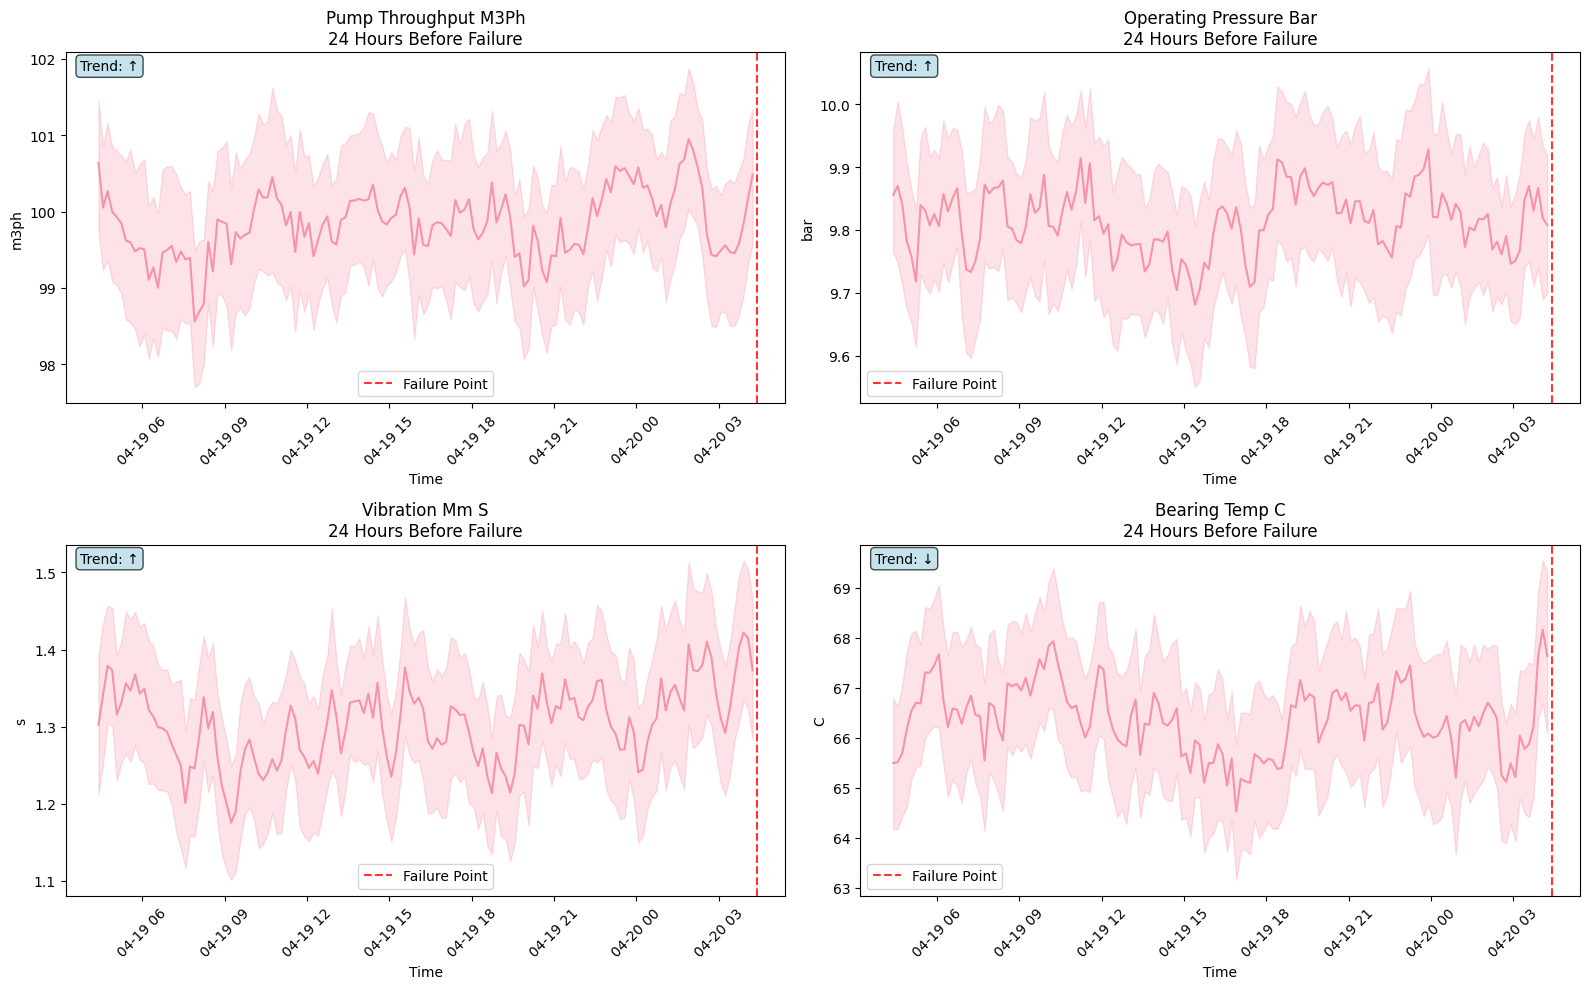


Pre-failure Parameter Changes (24h window):
  pump_throughput_m3ph: -0.309 (-0.3%) - Decreasing
  operating_pressure_bar: -0.001 (-0.0%) - Decreasing
  vibration_mm_s: +0.053 (+4.1%) - Increasing
  bearing_temp_C: +0.862 (+1.3%) - Increasing


In [14]:
# Analyze trends leading to failure events
print("\nFailure Event Timeline Analysis")
print("-" * 40)

# Identify failure events (transitions from RUNNING to DOWN)
df_sorted = df.sort_values('timestamp')
status_changes = (df_sorted['status'] != df_sorted['status'].shift(1))
failure_events = df_sorted[status_changes & (df_sorted['status'] == 'DOWN')]

print(f"Number of failure events detected: {len(failure_events)}")

if len(failure_events) > 0:
    print(f"Failure timestamps:")
    for i, timestamp in enumerate(failure_events['timestamp'].head(10)):
        print(f"  {i+1}. {timestamp}")

    # Analyze the period before the first major failure
    if len(failure_events) > 0:
        failure_time = failure_events['timestamp'].iloc[0]
        print(f"\nAnalyzing 24 hours before first failure: {failure_time}")

        # Extract 24-hour pre-failure window
        pre_failure_start = failure_time - pd.Timedelta(hours=24)
        pre_failure_data = df[(df['timestamp'] >= pre_failure_start) & (df['timestamp'] < failure_time)]

        if len(pre_failure_data) > 0:
            print(f"Records in 24h pre-failure window: {len(pre_failure_data)}")

            # Plot parameter trends leading to failure
            plt.figure(figsize=(16, 10))

            analysis_features = ['pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C']

            for idx, feature in enumerate(analysis_features, 1):
                if feature in pre_failure_data.columns:
                    plt.subplot(2, 2, idx)

                    # Plot the trend
                    sns.lineplot(data=pre_failure_data, x='timestamp', y=feature, alpha=0.7)

                    # Add failure point
                    plt.axvline(x=failure_time, color='red', linestyle='--', alpha=0.8, label='Failure Point')

                    plt.title(f'{feature.replace("_", " ").title()}\n24 Hours Before Failure')
                    plt.xlabel('Time')
                    plt.ylabel(feature.split('_')[-1] if '_' in feature else feature)
                    plt.xticks(rotation=45)
                    plt.legend()

                    # Calculate trend
                    if len(pre_failure_data) >= 2:
                        trend_slope = (pre_failure_data[feature].iloc[-1] - pre_failure_data[feature].iloc[0]) / len(pre_failure_data)
                        trend_direction = "↑" if trend_slope > 0 else "↓" if trend_slope < 0 else "→"
                        plt.text(0.02, 0.98, f'Trend: {trend_direction}', transform=plt.gca().transAxes,
                                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

            plt.tight_layout()
            plt.savefig('pre_failure_trends.png', dpi=300, bbox_inches='tight')
            plt.show()

            # Statistical analysis of pre-failure trends
            print(f"\nPre-failure Parameter Changes (24h window):")
            for feature in analysis_features:
                if feature in pre_failure_data.columns and len(pre_failure_data) >= 10:
                    early_period = pre_failure_data.head(len(pre_failure_data)//3)[feature].mean()
                    late_period = pre_failure_data.tail(len(pre_failure_data)//3)[feature].mean()
                    change = late_period - early_period
                    change_pct = (change / early_period) * 100 if early_period != 0 else 0
                    print(f"  {feature}: {change:+.3f} ({change_pct:+.1f}%) - {'Increasing' if change > 0 else 'Decreasing' if change < 0 else 'Stable'}")

#### **5.2 Research Question 2: Reliability and Uptime Performance Analysis**

**Primary Question:** What is the reliability and uptime performance across different pump units?

Understanding reliability variations across the fleet helps prioritize maintenance resources and identify best-performing units for operational insights.

In [15]:
print("\n" + "="*50)
print("RESEARCH QUESTION 2: FLEET RELIABILITY ANALYSIS")
print("="*50)

# Calculate fleet-wide uptime
if 'status' in df.columns and 'timestamp' in df.columns:
    # Overall fleet uptime calculation
    total_records = len(df)
    running_records = len(df[df['status'] == 'RUNNING'])
    fleet_uptime = (running_records / total_records) * 100

    print(f"Fleet-Wide Performance Metrics:")
    print(f"  Total monitoring records: {total_records:,}")
    print(f"  Records in RUNNING state: {running_records:,}")
    print(f"  Fleet uptime percentage: {fleet_uptime:.2f}%")

    # Time-based uptime calculation
    time_span = df['timestamp'].max() - df['timestamp'].min()
    print(f"  Monitoring duration: {time_span.days} days")

    # Calculate Mean Time Between Failures (MTBF) if applicable
    failure_events = len(df[df['status'] == 'DOWN']['timestamp'].drop_duplicates())
    if failure_events > 0:
        mtbf_hours = (time_span.total_seconds() / 3600) / failure_events
        print(f"  Estimated fleet MTBF: {mtbf_hours:.1f} hours")


RESEARCH QUESTION 2: FLEET RELIABILITY ANALYSIS
Fleet-Wide Performance Metrics:
  Total monitoring records: 720,050
  Records in RUNNING state: 671,600
  Fleet uptime percentage: 93.27%
  Monitoring duration: 100 days
  Estimated fleet MTBF: 0.2 hours


Sub-question: How does reliability vary across individual pump units?


Individual Pump Reliability Analysis
---------------------------------------------
Top 5 Most Reliable Pumps:
             total_records  uptime_pct  failure_count  avg_vibration  max_temperature  avg_throughput  MTBF_hours  reliability_score
pump_number                                                                                                                         
7.0                  14401       94.24            830           1.26            79.48           94.04         2.6               81.0
30.0                 14401       94.13            845           1.26            79.48           94.05         2.6               80.9
35.0                 14401       93.96            870           1.26            79.48           93.78         2.4               80.1
44.0                 14401       93.80            893           1.25            79.48           93.66         2.4               80.0
11.0                 14401       93.69            909           1.27            79.48      

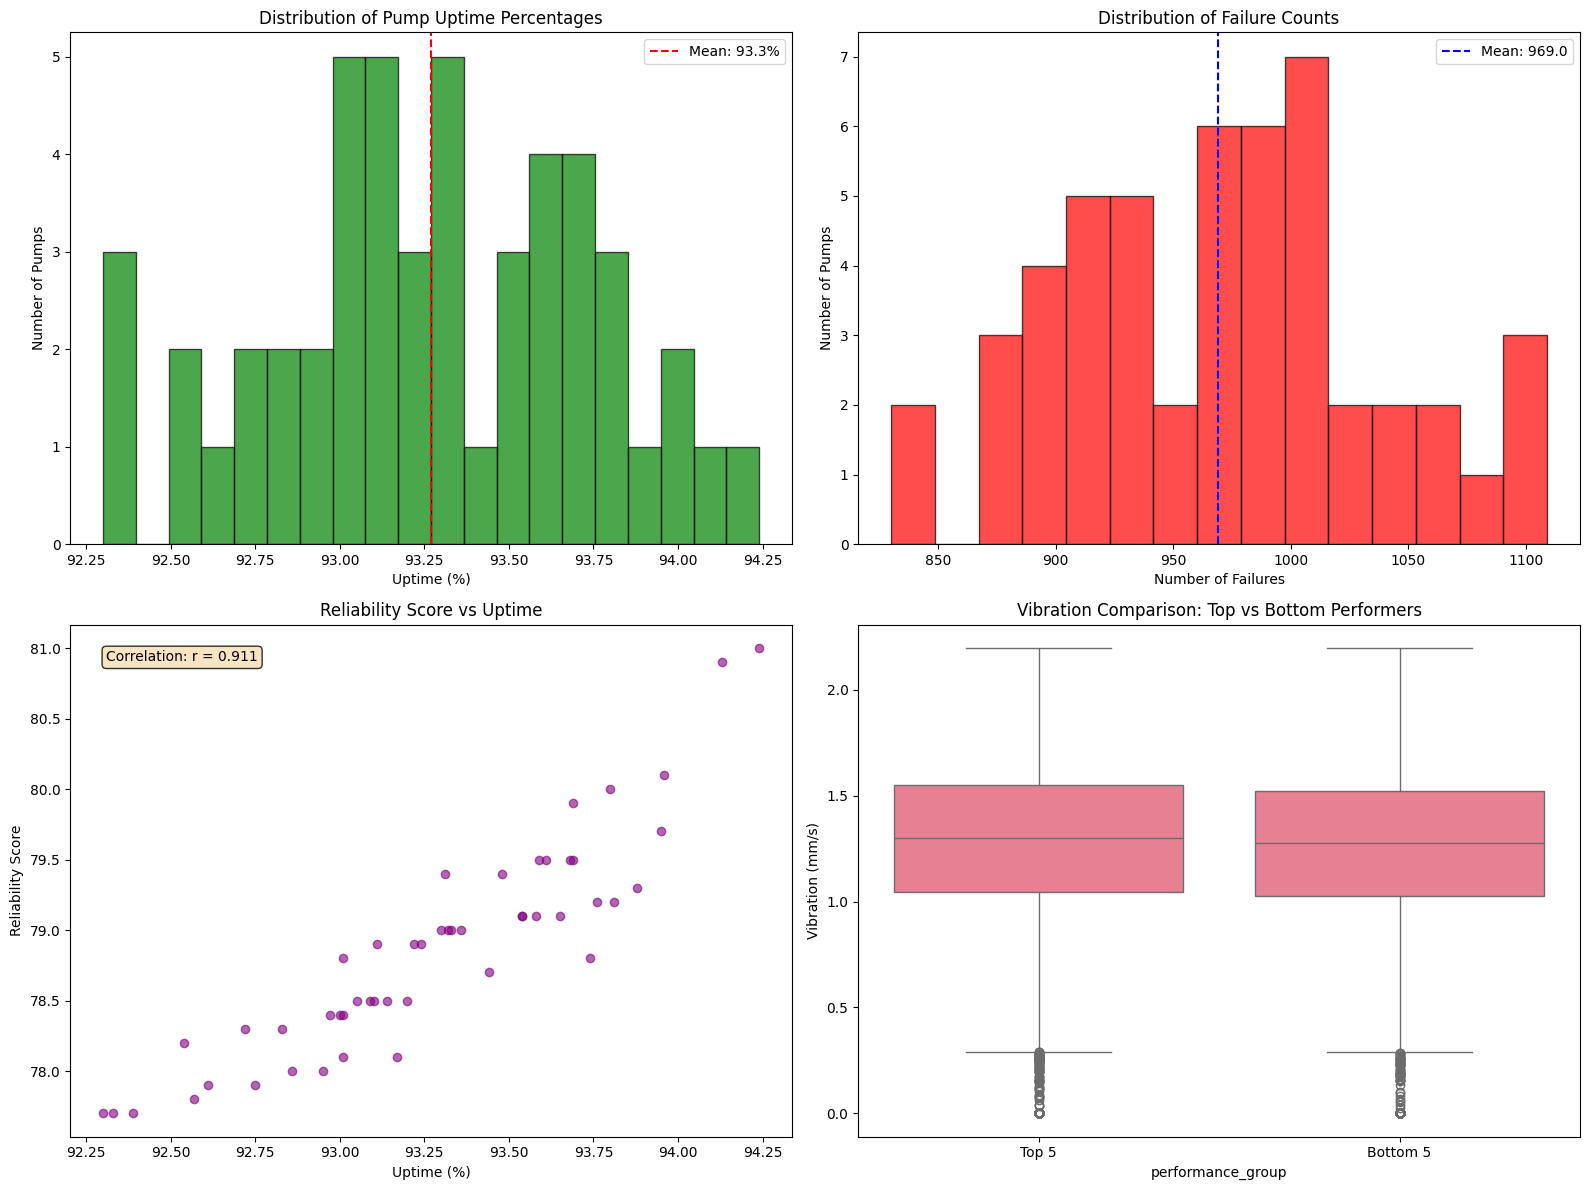

In [16]:
# Individual pump reliability analysis
if 'pump_number' in df.columns:
    print(f"\nIndividual Pump Reliability Analysis")
    print("-" * 45)

    # Calculate KPIs per pump
    pump_kpis = (df.groupby('pump_number')
                 .agg(
                     total_records=('status', 'count'),
                     uptime_pct=('status', lambda x: (x == 'RUNNING').mean() * 100),
                     failure_count=('status', lambda x: (x == 'DOWN').sum()),
                     avg_vibration=('vibration_mm_s', 'mean') if 'vibration_mm_s' in df.columns else ('status', lambda x: 0),
                     max_temperature=('bearing_temp_C', 'max') if 'bearing_temp_C' in df.columns else ('status', lambda x: 0),
                     avg_throughput=('pump_throughput_m3ph', 'mean') if 'pump_throughput_m3ph' in df.columns else ('status', lambda x: 0)
                 )
                 .round(2))

    # Calculate MTBF per pump
    def calculate_pump_mtbf(group):
        down_timestamps = group[group['status'] == 'DOWN']['timestamp'].drop_duplicates().sort_values()
        if len(down_timestamps) < 2:
            return 0.0
        time_diffs = down_timestamps.diff().dropna()
        return time_diffs.mean().total_seconds() / 3600  # Convert to hours

    pump_mtbf = df.groupby('pump_number').apply(calculate_pump_mtbf).fillna(0)
    pump_kpis['MTBF_hours'] = pump_mtbf.round(1)

    # Create composite reliability score
    # Weighting: Uptime (50%), Vibration (20%), Temperature (20%), MTBF (10%)
    max_mtbf = pump_kpis['MTBF_hours'].max() if pump_kpis['MTBF_hours'].max() > 0 else 1
    pump_kpis['reliability_score'] = (
        pump_kpis['uptime_pct'] * 0.5 +
        (100 - pump_kpis['avg_vibration']) * 0.2 +
        (100 - pump_kpis['max_temperature']) * 0.2 +
        (pump_kpis['MTBF_hours'] / max_mtbf * 100) * 0.1
    ).round(1)

    pump_kpis_sorted = pump_kpis.sort_values('reliability_score', ascending=False)

    print(f"Top 5 Most Reliable Pumps:")
    print(pump_kpis_sorted.head().to_string())

    print(f"\nBottom 5 Least Reliable Pumps:")
    print(pump_kpis_sorted.tail().to_string())

    # Statistical summary of pump performance
    print(f"\nFleet Performance Statistics:")
    print(f"  Uptime Range: {pump_kpis['uptime_pct'].min():.1f}% - {pump_kpis['uptime_pct'].max():.1f}%")
    print(f"  Average Fleet Uptime: {pump_kpis['uptime_pct'].mean():.1f}%")
    print(f"  Failure Count Range: {pump_kpis['failure_count'].min()} - {pump_kpis['failure_count'].max()}")
    print(f"  High-risk pumps (uptime < 95%): {len(pump_kpis[pump_kpis['uptime_pct'] < 95])}")

    # Visualization of pump reliability
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Uptime distribution
    axes[0,0].hist(pump_kpis['uptime_pct'], bins=20, alpha=0.7, color='green', edgecolor='black')
    axes[0,0].axvline(pump_kpis['uptime_pct'].mean(), color='red', linestyle='--', label=f'Mean: {pump_kpis["uptime_pct"].mean():.1f}%')
    axes[0,0].set_title('Distribution of Pump Uptime Percentages')
    axes[0,0].set_xlabel('Uptime (%)')
    axes[0,0].set_ylabel('Number of Pumps')
    axes[0,0].legend()

    # Failure count distribution
    axes[0,1].hist(pump_kpis['failure_count'], bins=15, alpha=0.7, color='red', edgecolor='black')
    axes[0,1].axvline(pump_kpis['failure_count'].mean(), color='blue', linestyle='--', label=f'Mean: {pump_kpis["failure_count"].mean():.1f}')
    axes[0,1].set_title('Distribution of Failure Counts')
    axes[0,1].set_xlabel('Number of Failures')
    axes[0,1].set_ylabel('Number of Pumps')
    axes[0,1].legend()

    # Reliability score vs uptime correlation
    axes[1,0].scatter(pump_kpis['uptime_pct'], pump_kpis['reliability_score'], alpha=0.6, color='purple')
    axes[1,0].set_xlabel('Uptime (%)')
    axes[1,0].set_ylabel('Reliability Score')
    axes[1,0].set_title('Reliability Score vs Uptime')

    # Add correlation coefficient
    correlation = pump_kpis['uptime_pct'].corr(pump_kpis['reliability_score'])
    axes[1,0].text(0.05, 0.95, f'Correlation: r = {correlation:.3f}',
                   transform=axes[1,0].transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Top/Bottom performers comparison
    top_5_pumps = pump_kpis_sorted.head(5).index.tolist()
    bottom_5_pumps = pump_kpis_sorted.tail(5).index.tolist()

    top_data = df[df['pump_number'].isin(top_5_pumps)]
    bottom_data = df[df['pump_number'].isin(bottom_5_pumps)]

    # Create comparison dataset
    top_data = top_data.copy()
    bottom_data = bottom_data.copy()
    top_data['performance_group'] = 'Top 5'
    bottom_data['performance_group'] = 'Bottom 5'
    comparison_data = pd.concat([top_data, bottom_data])

    if 'vibration_mm_s' in comparison_data.columns:
        sns.boxplot(data=comparison_data, x='performance_group', y='vibration_mm_s', ax=axes[1,1])
        axes[1,1].set_title('Vibration Comparison: Top vs Bottom Performers')
        axes[1,1].set_ylabel('Vibration (mm/s)')

    plt.tight_layout()
    plt.savefig('pump_reliability_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

#### **5.3 Research Question 3: Operational Anomaly Detection**

**Primary Question:** What operational anomalies require immediate attention?

Identifying anomalies is crucial for preventing failures and ensuring safe operation. We'll use statistical methods to detect unusual patterns.


RESEARCH QUESTION 3: OPERATIONAL ANOMALY DETECTION
Statistical Anomaly Analysis
-----------------------------------

Pump Throughput M3Ph:
  Normal range (IQR): 96.97 - 101.98
  IQR outliers: 49,176 (6.8%)
  Z-score outliers: 48,450 (6.7%)
  Extreme values: 7,201 (1.0%)

Operating Pressure Bar:
  Normal range (IQR): 9.38 - 10.09
  IQR outliers: 51,256 (7.1%)
  Z-score outliers: 48,450 (6.7%)
  Extreme values: 7,201 (1.0%)

Vibration Mm S:
  Normal range (IQR): 1.04 - 1.54
  IQR outliers: 49,187 (6.8%)
  Z-score outliers: 0 (0.0%)
  Extreme values: 7,201 (1.0%)

Bearing Temp C:
  Normal range (IQR): 62.22 - 69.81
  IQR outliers: 49,233 (6.8%)
  Z-score outliers: 44,069 (6.1%)
  Extreme values: 14,402 (2.0%)

Anomaly Detection Summary:
             Parameter  IQR_Outliers  Z_Score_Outliers  Extreme_Values  Min_Value  Max_Value   Normal_Range
  pump_throughput_m3ph         49176             48450            7201   0.000000 107.723014 96.97 - 101.98
operating_pressure_bar         51256   

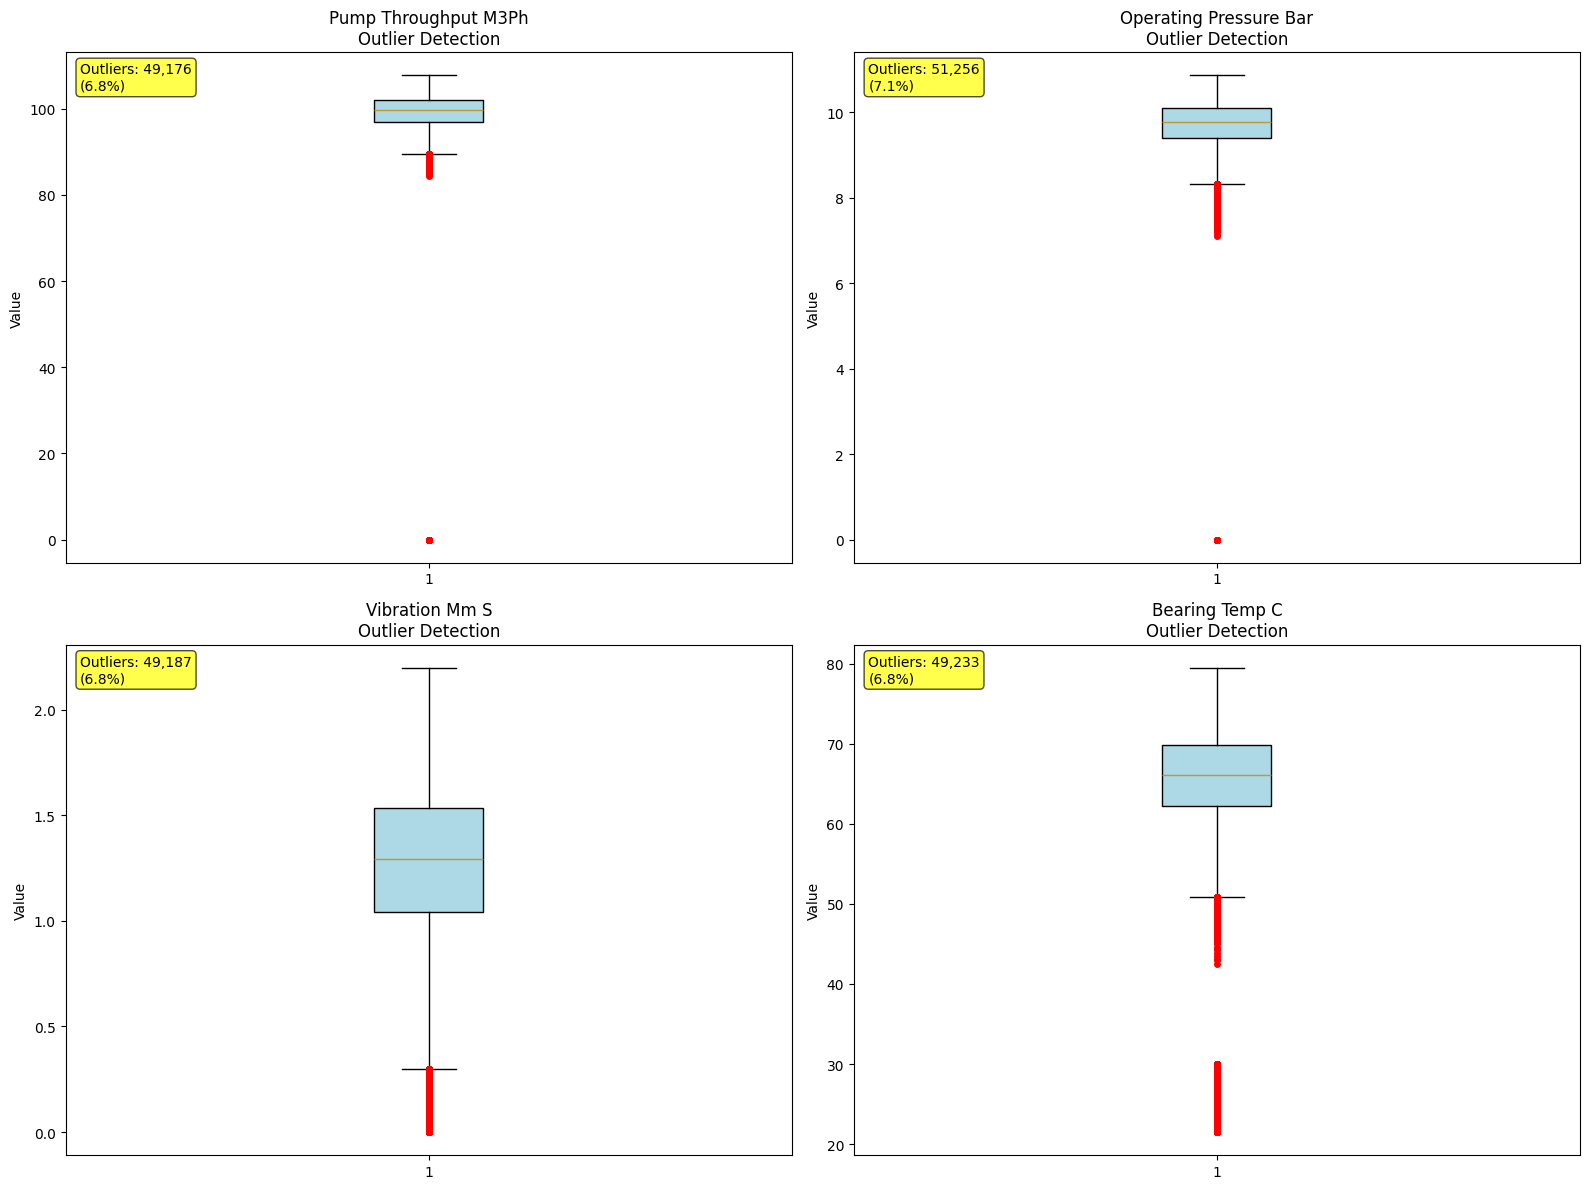

In [17]:
print("\n" + "="*50)
print("RESEARCH QUESTION 3: OPERATIONAL ANOMALY DETECTION")
print("="*50)

# Statistical anomaly detection using multiple methods
anomaly_features = ['pump_throughput_m3ph', 'operating_pressure_bar', 'vibration_mm_s', 'bearing_temp_C']

print("Statistical Anomaly Analysis")
print("-" * 35)

anomaly_summary = []

for feature in anomaly_features:
    if feature in df.columns:
        # Method 1: IQR-based outliers
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        iqr_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

        # Method 2: Z-score based outliers (|z| > 3)
        z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
        z_outliers = df[z_scores > 3]

        # Method 3: Percentile-based extreme values (beyond 1st and 99th percentiles)
        p1 = df[feature].quantile(0.01)
        p99 = df[feature].quantile(0.99)
        extreme_values = df[(df[feature] < p1) | (df[feature] > p99)]

        anomaly_summary.append({
            'Parameter': feature,
            'IQR_Outliers': len(iqr_outliers),
            'Z_Score_Outliers': len(z_outliers),
            'Extreme_Values': len(extreme_values),
            'Min_Value': df[feature].min(),
            'Max_Value': df[feature].max(),
            'Normal_Range': f"{Q1:.2f} - {Q3:.2f}"
        })

        print(f"\n{feature.replace('_', ' ').title()}:")
        print(f"  Normal range (IQR): {Q1:.2f} - {Q3:.2f}")
        print(f"  IQR outliers: {len(iqr_outliers):,} ({len(iqr_outliers)/len(df)*100:.1f}%)")
        print(f"  Z-score outliers: {len(z_outliers):,} ({len(z_outliers)/len(df)*100:.1f}%)")
        print(f"  Extreme values: {len(extreme_values):,} ({len(extreme_values)/len(df)*100:.1f}%)")

# Create anomaly summary dataframe
anomaly_df = pd.DataFrame(anomaly_summary)
print(f"\nAnomaly Detection Summary:")
print(anomaly_df.to_string(index=False))

# Visualize anomalies
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, feature in enumerate(anomaly_features):
    if feature in df.columns:
        ax = axes[idx//2, idx%2]

        # Create box plot with outliers highlighted
        bp = ax.boxplot(df[feature], patch_artist=True, showfliers=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['fliers'][0].set_markerfacecolor('red')
        bp['fliers'][0].set_markeredgecolor('red')
        bp['fliers'][0].set_markersize(4)

        ax.set_title(f'{feature.replace("_", " ").title()}\nOutlier Detection')
        ax.set_ylabel('Value')

        # Add statistics text
        Q1, Q3 = df[feature].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        outlier_count = len(df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)])

        ax.text(0.02, 0.98, f'Outliers: {outlier_count:,}\n({outlier_count/len(df)*100:.1f}%)',
               transform=ax.transAxes, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.savefig('anomaly_detection.png', dpi=300, bbox_inches='tight')
plt.show()

Sub-question: Are there specific pumps that consistently exhibit anomalous behavior?


Pump-Specific Anomaly Analysis
-----------------------------------
Top 10 Pumps with Highest Anomaly Rates:
 Pump_Number  Total_Records  Anomaly_Count  Anomaly_Rate_Pct
        29.0          14401           4529         31.449205
        48.0          14401           4498         31.233942
         2.0          14401           4468         31.025623
        18.0          14401           4394         30.511770
        25.0          14401           4381         30.421499
        50.0          14401           4330         30.067356
        28.0          14401           4259         29.574335
        19.0          14401           4245         29.477120
        15.0          14401           4229         29.366016
        20.0          14401           4195         29.129922

Pumps Requiring Immediate Attention (Anomaly Rate > 10%):
 Pump_Number  Total_Records  Anomaly_Count  Anomaly_Rate_Pct
        29.0          14401           4529         31.449205
        48.0          14401           4

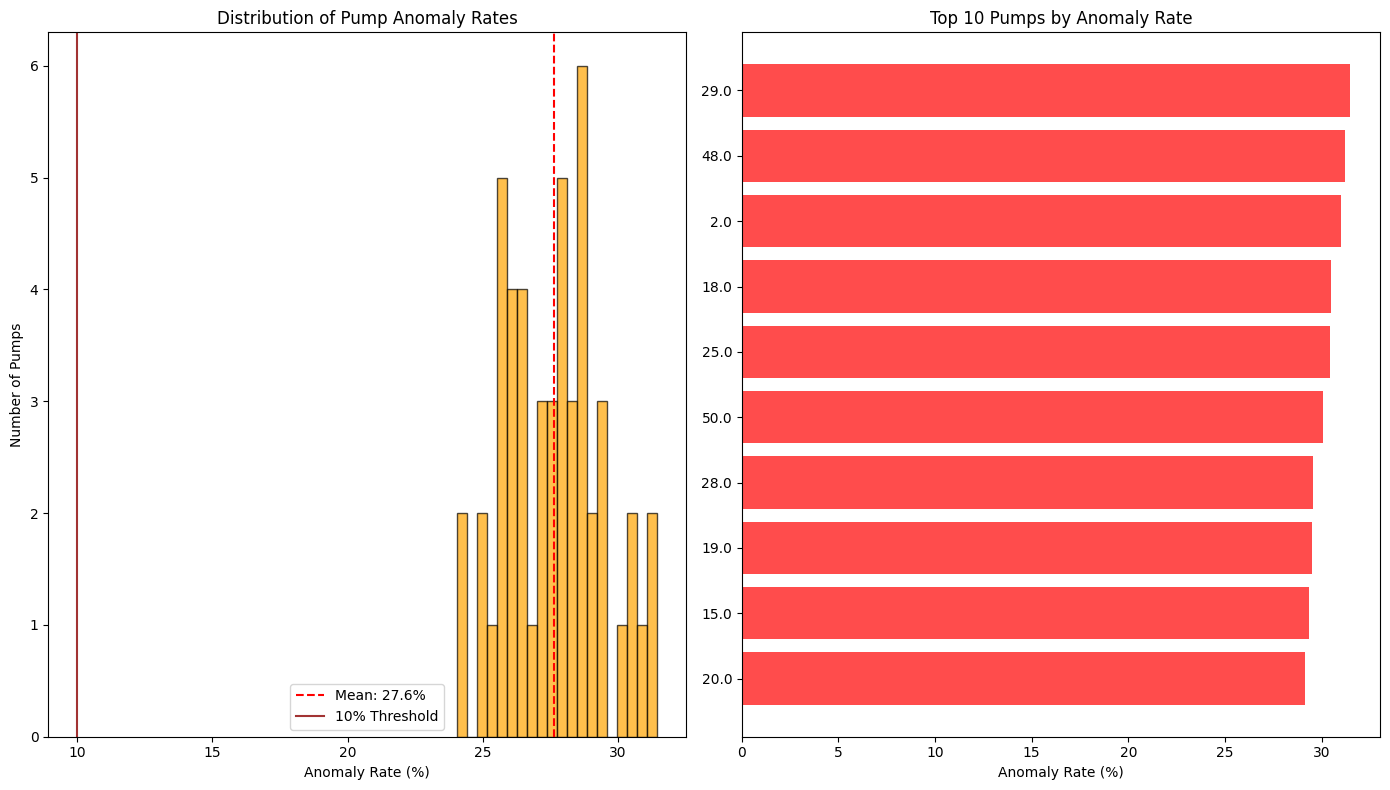

In [18]:
# Identify pumps with frequent anomalies
print(f"\nPump-Specific Anomaly Analysis")
print("-" * 35)

if 'pump_number' in df.columns:
    pump_anomalies = []

    for pump in df['pump_number'].unique():
        pump_data = df[df['pump_number'] == pump]
        pump_anomaly_count = 0

        for feature in anomaly_features:
            if feature in df.columns:
                Q1 = df[feature].quantile(0.25)
                Q3 = df[feature].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                feature_anomalies = len(pump_data[(pump_data[feature] < lower_bound) |
                                                 (pump_data[feature] > upper_bound)])
                pump_anomaly_count += feature_anomalies

        anomaly_rate = pump_anomaly_count / len(pump_data) * 100 if len(pump_data) > 0 else 0

        pump_anomalies.append({
            'Pump_Number': pump,
            'Total_Records': len(pump_data),
            'Anomaly_Count': pump_anomaly_count,
            'Anomaly_Rate_Pct': anomaly_rate
        })

    pump_anomaly_df = pd.DataFrame(pump_anomalies).sort_values('Anomaly_Rate_Pct', ascending=False)

    print(f"Top 10 Pumps with Highest Anomaly Rates:")
    print(pump_anomaly_df.head(10).to_string(index=False))

    print(f"\nPumps Requiring Immediate Attention (Anomaly Rate > 10%):")
    high_risk_pumps = pump_anomaly_df[pump_anomaly_df['Anomaly_Rate_Pct'] > 10]
    if len(high_risk_pumps) > 0:
        print(high_risk_pumps.to_string(index=False))
        print(f"\nTotal high-risk pumps: {len(high_risk_pumps)} out of {len(pump_anomaly_df)} ({len(high_risk_pumps)/len(pump_anomaly_df)*100:.1f}%)")
    else:
        print("No pumps exceed 10% anomaly rate threshold.")

    # Visualize pump anomaly rates
    plt.figure(figsize=(14, 8))

    plt.subplot(1, 2, 1)
    plt.hist(pump_anomaly_df['Anomaly_Rate_Pct'], bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.axvline(pump_anomaly_df['Anomaly_Rate_Pct'].mean(), color='red', linestyle='--',
               label=f'Mean: {pump_anomaly_df["Anomaly_Rate_Pct"].mean():.1f}%')
    plt.axvline(10, color='darkred', linestyle='-', alpha=0.8, label='10% Threshold')
    plt.xlabel('Anomaly Rate (%)')
    plt.ylabel('Number of Pumps')
    plt.title('Distribution of Pump Anomaly Rates')
    plt.legend()

    plt.subplot(1, 2, 2)
    top_10_pumps = pump_anomaly_df.head(10)
    plt.barh(range(len(top_10_pumps)), top_10_pumps['Anomaly_Rate_Pct'], color='red', alpha=0.7)
    plt.yticks(range(len(top_10_pumps)), top_10_pumps['Pump_Number'])
    plt.xlabel('Anomaly Rate (%)')
    plt.title('Top 10 Pumps by Anomaly Rate')
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.savefig('pump_anomaly_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

### **6. Advanced Pattern Recognition**
#### **6.1 Multi-Parameter Anomaly Detection**
**Question:** Can we identify complex anomalies that involve multiple parameters simultaneously?

Single-parameter outliers might miss complex failure modes where multiple sensors show coordinated but individually normal deviations.


ADVANCED PATTERN RECOGNITION
Multi-Parameter Anomaly Detection
--------------------------------------
Multivariate Outlier Analysis:
  Total records analyzed: 720,050
  Mahalanobis distance threshold (95th percentile): 3.72
  Multivariate outliers detected: 36,003 (5.0%)

Outlier Status Distribution:
  DOWN: 32205 (89.5%)
  RUNNING: 3798 (10.5%)

Failure Enrichment in Outliers:
  Overall DOWN rate: 6.7%
  Outlier DOWN rate: 89.5%
  Enrichment factor: 13.3x


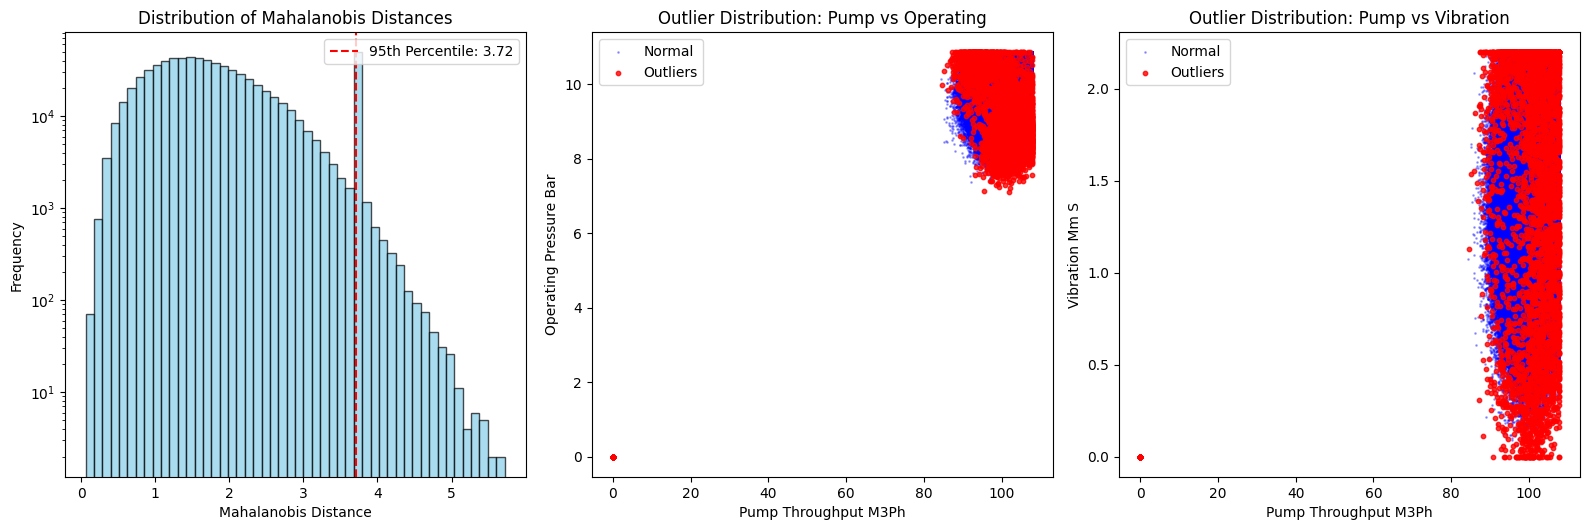

In [19]:
print("\n" + "="*50)
print("ADVANCED PATTERN RECOGNITION")
print("="*50)

# Multi-dimensional anomaly detection using Mahalanobis distance
from scipy.spatial.distance import mahalanobis
from numpy.linalg import inv

print("Multi-Parameter Anomaly Detection")
print("-" * 38)

# Select features for multi-dimensional analysis
analysis_features = [f for f in anomaly_features if f in df.columns]

if len(analysis_features) >= 2:
    # Create feature matrix
    feature_matrix = df[analysis_features].values

    # Calculate covariance matrix and its inverse
    cov_matrix = np.cov(feature_matrix.T)
    inv_cov_matrix = inv(cov_matrix)
    mean_vector = np.mean(feature_matrix, axis=0)

    # Calculate Mahalanobis distance for each record
    mahalanobis_distances = []
    for i in range(len(feature_matrix)):
        distance = mahalanobis(feature_matrix[i], mean_vector, inv_cov_matrix)
        mahalanobis_distances.append(distance)

    df['mahalanobis_distance'] = mahalanobis_distances

    # Define threshold (e.g., 95th percentile)
    threshold = np.percentile(mahalanobis_distances, 95)
    multivariate_outliers = df[df['mahalanobis_distance'] > threshold]

    print(f"Multivariate Outlier Analysis:")
    print(f"  Total records analyzed: {len(df):,}")
    print(f"  Mahalanobis distance threshold (95th percentile): {threshold:.2f}")
    print(f"  Multivariate outliers detected: {len(multivariate_outliers):,} ({len(multivariate_outliers)/len(df)*100:.1f}%)")

    # Analyze relationship between multivariate outliers and pump status
    if 'status' in df.columns:
        outlier_status_dist = multivariate_outliers['status'].value_counts()
        print(f"\nOutlier Status Distribution:")
        for status, count in outlier_status_dist.items():
            pct = (count / len(multivariate_outliers)) * 100
            print(f"  {status}: {count} ({pct:.1f}%)")

        # Compare with overall status distribution
        overall_down_pct = (df['status'] == 'DOWN').mean() * 100
        outlier_down_pct = (multivariate_outliers['status'] == 'DOWN').mean() * 100
        enrichment_factor = outlier_down_pct / overall_down_pct if overall_down_pct > 0 else float('inf')

        print(f"\nFailure Enrichment in Outliers:")
        print(f"  Overall DOWN rate: {overall_down_pct:.1f}%")
        print(f"  Outlier DOWN rate: {outlier_down_pct:.1f}%")
        print(f"  Enrichment factor: {enrichment_factor:.1f}x")

    # Visualize multivariate outliers
    plt.figure(figsize=(16, 10))

    # Mahalanobis distance distribution
    plt.subplot(2, 3, 1)
    plt.hist(mahalanobis_distances, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.axvline(threshold, color='red', linestyle='--', label=f'95th Percentile: {threshold:.2f}')
    plt.xlabel('Mahalanobis Distance')
    plt.ylabel('Frequency')
    plt.title('Distribution of Mahalanobis Distances')
    plt.legend()
    plt.yscale('log')

    # Feature relationships for outliers vs normal
    if len(analysis_features) >= 2:
        normal_data = df[df['mahalanobis_distance'] <= threshold]

        for idx, (feat1, feat2) in enumerate([(analysis_features[0], analysis_features[1]),
                                            (analysis_features[0], analysis_features[2]) if len(analysis_features) > 2 else (analysis_features[0], analysis_features[1])]):
            plt.subplot(2, 3, idx + 2)
            plt.scatter(normal_data[feat1], normal_data[feat2], alpha=0.3, c='blue', s=1, label='Normal')
            plt.scatter(multivariate_outliers[feat1], multivariate_outliers[feat2], alpha=0.8, c='red', s=10, label='Outliers')
            plt.xlabel(feat1.replace('_', ' ').title())
            plt.ylabel(feat2.replace('_', ' ').title())
            plt.title(f'Outlier Distribution: {feat1.split("_")[0].title()} vs {feat2.split("_")[0].title()}')
            plt.legend()

    plt.tight_layout()
    plt.savefig('multivariate_anomaly_detection.png', dpi=300, bbox_inches='tight')
    plt.show()

#### **6.2 Temporal Pattern Analysis**
**Question:** Are there recurring patterns or cycles in the operational data that could indicate systematic issues?


Temporal Pattern Recognition
--------------------------------
Operational Patterns by Time of Day:
Peak failure hours:
  Hour 10:00 - 7.2% failure rate
  Hour 09:00 - 7.2% failure rate
  Hour 11:00 - 7.1% failure rate

Parameter Variations by Time:
  pump_throughput_m3ph:
    Peak hour: 21:00 (93.59)
    Trough hour: 10:00 (92.72)
    Daily variation range: 0.87
  operating_pressure_bar:
    Peak hour: 20:00 (9.17)
    Trough hour: 10:00 (9.09)
    Daily variation range: 0.08


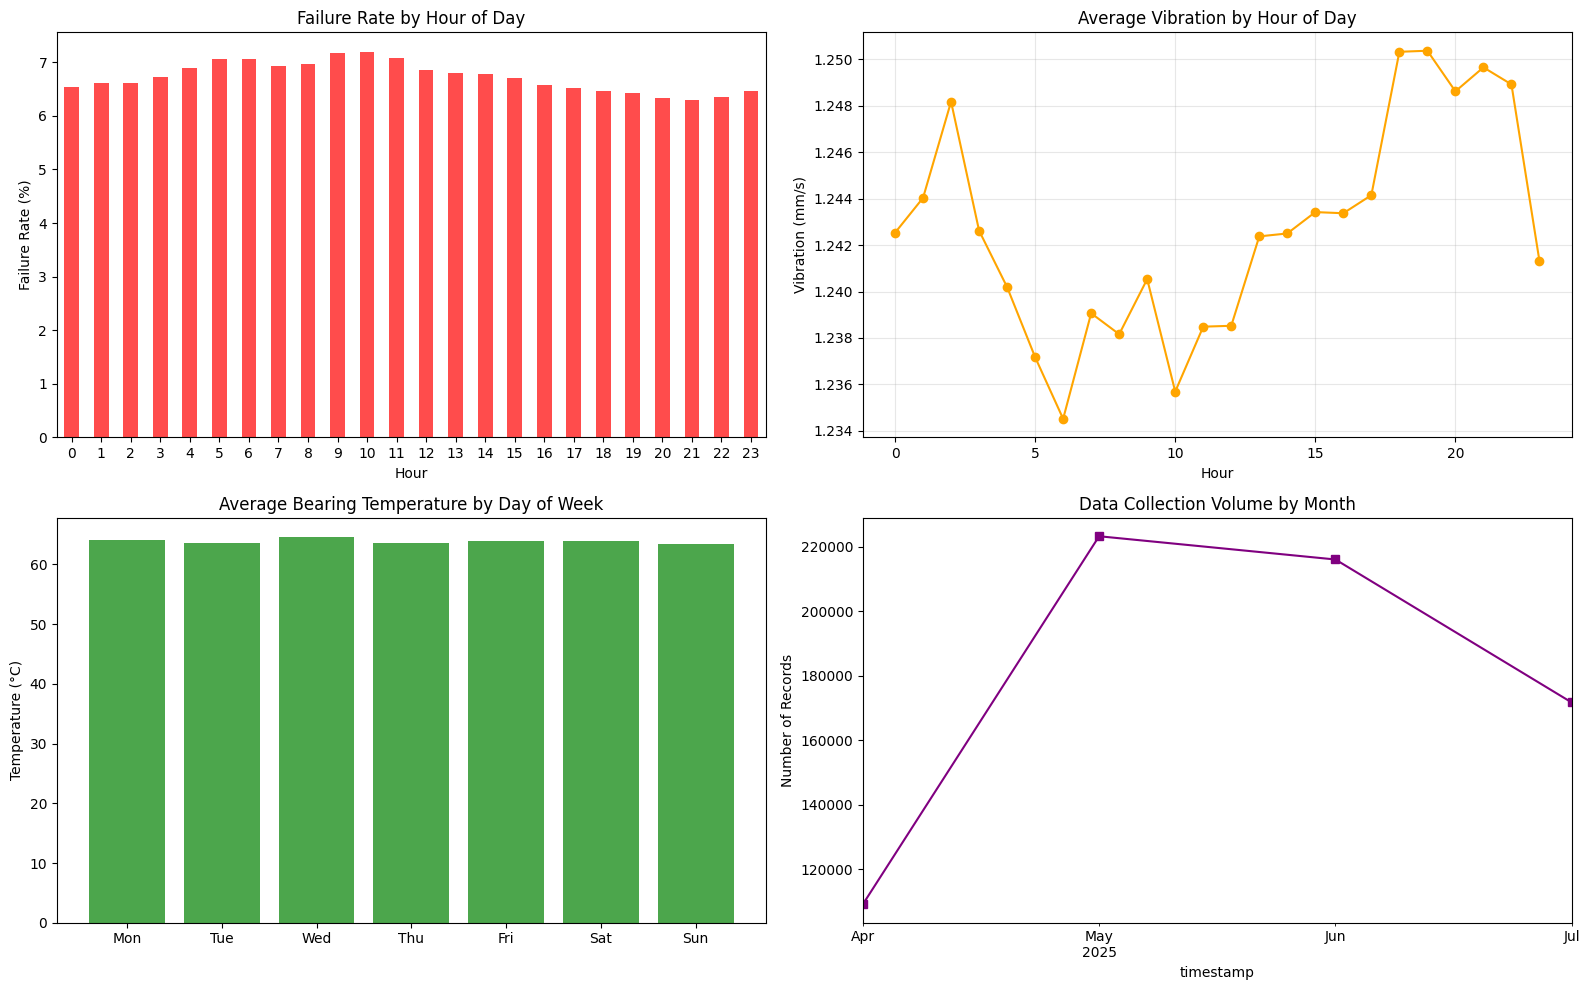

In [20]:
print(f"\nTemporal Pattern Recognition")
print("-" * 32)

if 'timestamp' in df.columns:
    # Add time-based features
    df['hour_of_day'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
    df['day_of_month'] = df['timestamp'].dt.day

    # Analyze patterns by time of day
    print("Operational Patterns by Time of Day:")

    if 'status' in df.columns:
        hourly_failure_rate = (df.groupby('hour_of_day')['status']
                              .apply(lambda x: (x == 'DOWN').sum() / len(x) * 100)
                              .round(2))

        peak_failure_hours = hourly_failure_rate.nlargest(3)
        print(f"Peak failure hours:")
        for hour, rate in peak_failure_hours.items():
            print(f"  Hour {hour:02d}:00 - {rate:.1f}% failure rate")

    # Analyze parameter variations by time
    if analysis_features:
        print(f"\nParameter Variations by Time:")

        for feature in analysis_features[:2]:  # Analyze first 2 features
            hourly_stats = df.groupby('hour_of_day')[feature].agg(['mean', 'std']).round(3)
            peak_hour = hourly_stats['mean'].idxmax()
            trough_hour = hourly_stats['mean'].idxmin()
            variation_range = hourly_stats['mean'].max() - hourly_stats['mean'].min()

            print(f"  {feature}:")
            print(f"    Peak hour: {peak_hour:02d}:00 ({hourly_stats.loc[peak_hour, 'mean']:.2f})")
            print(f"    Trough hour: {trough_hour:02d}:00 ({hourly_stats.loc[trough_hour, 'mean']:.2f})")
            print(f"    Daily variation range: {variation_range:.2f}")

    # Visualize temporal patterns
    plt.figure(figsize=(16, 10))

    # Failure rate by hour
    if 'status' in df.columns:
        plt.subplot(2, 2, 1)
        hourly_failure_rate.plot(kind='bar', color='red', alpha=0.7)
        plt.title('Failure Rate by Hour of Day')
        plt.xlabel('Hour')
        plt.ylabel('Failure Rate (%)')
        plt.xticks(rotation=0)

    # Parameter variation by hour (example: vibration)
    if 'vibration_mm_s' in df.columns:
        plt.subplot(2, 2, 2)
        hourly_vib = df.groupby('hour_of_day')['vibration_mm_s'].mean()
        hourly_vib.plot(kind='line', marker='o', color='orange')
        plt.title('Average Vibration by Hour of Day')
        plt.xlabel('Hour')
        plt.ylabel('Vibration (mm/s)')
        plt.grid(True, alpha=0.3)

    # Weekly patterns
    if 'bearing_temp_C' in df.columns:
        plt.subplot(2, 2, 3)
        day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        weekly_temp = df.groupby('day_of_week')['bearing_temp_C'].mean()
        plt.bar(range(7), weekly_temp.values, color='green', alpha=0.7)
        plt.xticks(range(7), day_names)
        plt.title('Average Bearing Temperature by Day of Week')
        plt.ylabel('Temperature (°C)')

    # Monthly trends (if data spans multiple months)
    if df['timestamp'].dt.month.nunique() > 1:
        plt.subplot(2, 2, 4)
        monthly_records = df.groupby(df['timestamp'].dt.to_period('M')).size()
        monthly_records.plot(kind='line', marker='s', color='purple')
        plt.title('Data Collection Volume by Month')
        plt.ylabel('Number of Records')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.savefig('temporal_patterns.png', dpi=300, bbox_inches='tight')
    plt.show()

### **7. Key Findings and Insights**
#### **7.1 Critical Operational Patterns**
Based on our comprehensive analysis, several critical patterns have emerged that have significant implications for predictive maintenance strategies:



In [21]:
print("\n" + "="*60)
print("KEY FINDINGS AND ACTIONABLE INSIGHTS")
print("="*60)

# Summarize key findings
print("1. FAILURE PREDICTION INDICATORS")
print("-" * 35)

if 'status' in df.columns and len(df['status'].unique()) > 1:
    # Calculate key discriminators
    running_data = df[df['status'] == 'RUNNING']
    down_data = df[df['status'] == 'DOWN']

    key_indicators = []

    for feature in analysis_features:
        if feature in df.columns:
            running_mean = running_data[feature].mean()
            down_mean = down_data[feature].mean()
            difference = abs(down_mean - running_mean)
            discrimination_power = difference / running_data[feature].std()

            key_indicators.append({
                'Parameter': feature,
                'Running_Mean': running_mean,
                'Down_Mean': down_mean,
                'Difference': difference,
                'Discrimination_Power': discrimination_power
            })

    # Sort by discrimination power
    key_indicators_df = pd.DataFrame(key_indicators).sort_values('Discrimination_Power', ascending=False)

    print("Top Failure Indicators (ranked by discrimination power):")
    for i, row in key_indicators_df.head(3).iterrows():
        param = row['Parameter'].replace('_', ' ').title()
        direction = "increases" if row['Down_Mean'] > row['Running_Mean'] else "decreases"
        change = abs((row['Down_Mean'] - row['Running_Mean']) / row['Running_Mean'] * 100)
        print(f"  {i+1}. {param} {direction} by {change:.1f}% during failures")
        print(f"     Normal: {row['Running_Mean']:.2f}, Failure: {row['Down_Mean']:.2f}")

print(f"\n2. FLEET RELIABILITY INSIGHTS")
print("-" * 30)

if 'pump_number' in df.columns and len(pump_kpis_sorted) > 0:
    print(f"Fleet Performance Summary:")
    print(f"  Total pumps monitored: {len(pump_kpis_sorted)}")
    print(f"  Fleet average uptime: {pump_kpis_sorted['uptime_pct'].mean():.1f}%")
    print(f"  Best performer: Pump {pump_kpis_sorted.index[0]} ({pump_kpis_sorted.iloc[0]['uptime_pct']:.1f}% uptime)")
    print(f"  Worst performer: Pump {pump_kpis_sorted.index[-1]} ({pump_kpis_sorted.iloc[-1]['uptime_pct']:.1f}% uptime)")

    # Identify performance clusters
    high_performers = pump_kpis_sorted[pump_kpis_sorted['uptime_pct'] >= 98]
    average_performers = pump_kpis_sorted[(pump_kpis_sorted['uptime_pct'] >= 95) & (pump_kpis_sorted['uptime_pct'] < 98)]
    poor_performers = pump_kpis_sorted[pump_kpis_sorted['uptime_pct'] < 95]

    print(f"\nPerformance Distribution:")
    print(f"  High performers (≥98% uptime): {len(high_performers)} pumps")
    print(f"  Average performers (95-98% uptime): {len(average_performers)} pumps")
    print(f"  Poor performers (<95% uptime): {len(poor_performers)} pumps")

    if len(poor_performers) > 0:
        print(f"\nImmediate Attention Required:")
        for pump_id in poor_performers.head(3).index:
            uptime = poor_performers.loc[pump_id, 'uptime_pct']
            failures = poor_performers.loc[pump_id, 'failure_count']
            print(f"  Pump {pump_id}: {uptime:.1f}% uptime, {failures} failures")

print(f"\n3. ANOMALY DETECTION RESULTS")
print("-" * 32)

if 'mahalanobis_distance' in df.columns:
    high_risk_records = len(df[df['mahalanobis_distance'] > threshold])
    print(f"Multi-parameter Anomaly Summary:")
    print(f"  Records flagged as anomalous: {high_risk_records:,} ({high_risk_records/len(df)*100:.1f}%)")
    print(f"  Anomaly detection threshold: {threshold:.2f}")

    if 'status' in df.columns:
        outlier_failure_correlation = (df[df['mahalanobis_distance'] > threshold]['status'] == 'DOWN').mean() * 100
        normal_failure_rate = (df[df['mahalanobis_distance'] <= threshold]['status'] == 'DOWN').mean() * 100

        print(f"  Failure rate in anomalous records: {outlier_failure_correlation:.1f}%")
        print(f"  Failure rate in normal records: {normal_failure_rate:.1f}%")

        if normal_failure_rate > 0:
            risk_multiplier = outlier_failure_correlation / normal_failure_rate
            print(f"  Risk multiplier for anomalous records: {risk_multiplier:.1f}x higher failure rate")

print(f"\n4. OPERATIONAL THRESHOLDS")
print("-" * 28)

# Define recommended monitoring thresholds based on analysis
monitoring_thresholds = {}

for feature in analysis_features:
    if feature in df.columns:
        # Calculate statistical thresholds
        mean_val = df[feature].mean()
        std_val = df[feature].std()

        # Conservative thresholds (2 standard deviations)
        warning_threshold = mean_val + 2 * std_val
        critical_threshold = mean_val + 3 * std_val

        monitoring_thresholds[feature] = {
            'normal_range': f"{mean_val - std_val:.2f} - {mean_val + std_val:.2f}",
            'warning_threshold': warning_threshold,
            'critical_threshold': critical_threshold
        }

print("Recommended Monitoring Thresholds:")
for param, thresholds in monitoring_thresholds.items():
    param_name = param.replace('_', ' ').title()
    print(f"  {param_name}:")
    print(f"    Normal range: {thresholds['normal_range']}")
    print(f"    Warning level: >{thresholds['warning_threshold']:.2f}")
    print(f"    Critical level: >{thresholds['critical_threshold']:.2f}")


KEY FINDINGS AND ACTIONABLE INSIGHTS
1. FAILURE PREDICTION INDICATORS
-----------------------------------
Top Failure Indicators (ranked by discrimination power):
  1. Pump Throughput M3Ph decreases by 100.0% during failures
     Normal: 99.87, Failure: 0.00
  2. Operating Pressure Bar decreases by 100.0% during failures
     Normal: 9.78, Failure: 0.00
  4. Bearing Temp C decreases by 62.3% during failures
     Normal: 66.66, Failure: 25.11

2. FLEET RELIABILITY INSIGHTS
------------------------------
Fleet Performance Summary:
  Total pumps monitored: 50
  Fleet average uptime: 93.3%
  Best performer: Pump 7.0 (94.2% uptime)
  Worst performer: Pump 48.0 (92.3% uptime)

Performance Distribution:
  High performers (≥98% uptime): 0 pumps
  Average performers (95-98% uptime): 0 pumps
  Poor performers (<95% uptime): 50 pumps

Immediate Attention Required:
  Pump 7.0: 94.2% uptime, 830 failures
  Pump 30.0: 94.1% uptime, 845 failures
  Pump 35.0: 94.0% uptime, 870 failures

3. ANOMALY DE

#### **7.2 Predictive Maintenance Recommendations**

**Question:** Based on our findings, what specific actions should be taken to implement effective predictive maintenance?

In [22]:
print(f"\n5. PREDICTIVE MAINTENANCE RECOMMENDATIONS")
print("-" * 45)

print("IMMEDIATE ACTIONS (0-30 days):")
print("• Implement real-time monitoring for top 3 failure indicators:")

if 'key_indicators_df' in locals():
    for i, row in key_indicators_df.head(3).iterrows():
        param_name = row['Parameter'].replace('_', ' ').title()
        threshold = monitoring_thresholds[row['Parameter']]['warning_threshold']
        print(f"  - {param_name}: Alert when >{threshold:.2f}")

if 'poor_performers' in locals() and len(poor_performers) > 0:
    print(f"• Schedule immediate inspection for {len(poor_performers)} underperforming pumps:")
    for pump_id in poor_performers.head(5).index:
        print(f"  - Pump {pump_id} (uptime: {poor_performers.loc[pump_id, 'uptime_pct']:.1f}%)")

print(f"\nSHORT-TERM STRATEGY (1-6 months):")
print("• Deploy machine learning models for failure prediction")
print("• Establish condition-based maintenance schedules")
print("• Create automated alert systems for anomaly detection")
print("• Implement vibration analysis program for high-risk units")

print(f"\nLONG-TERM OPTIMIZATION (6-12 months):")
print("• Develop digital twin models for each pump type")
print("• Optimize maintenance intervals based on operational patterns")
print("• Implement advanced analytics for root cause analysis")
print("• Establish benchmarking program across similar facilities")

# Calculate potential cost savings
if 'pump_kpis_sorted' in locals():
    current_avg_uptime = pump_kpis_sorted['uptime_pct'].mean()
    target_uptime = 98.0  # Target improvement
    uptime_improvement = target_uptime - current_avg_uptime

    print(f"\n6. EXPECTED BUSINESS IMPACT")
    print("-" * 30)
    print(f"Current fleet average uptime: {current_avg_uptime:.1f}%")
    print(f"Target uptime with predictive maintenance: {target_uptime:.1f}%")
    print(f"Potential uptime improvement: {uptime_improvement:.1f} percentage points")

    if uptime_improvement > 0:
        print(f"\nEstimated Benefits:")
        print(f"• Reduced unplanned downtime by {uptime_improvement:.1f}%")
        print(f"• Extended equipment life through optimized maintenance")
        print(f"• Improved operational efficiency and product quality")
        print(f"• Reduced emergency repair costs")


5. PREDICTIVE MAINTENANCE RECOMMENDATIONS
---------------------------------------------
IMMEDIATE ACTIONS (0-30 days):
• Implement real-time monitoring for top 3 failure indicators:
  - Pump Throughput M3Ph: Alert when >143.60
  - Operating Pressure Bar: Alert when >14.12
  - Bearing Temp C: Alert when >87.03
• Schedule immediate inspection for 50 underperforming pumps:
  - Pump 7.0 (uptime: 94.2%)
  - Pump 30.0 (uptime: 94.1%)
  - Pump 35.0 (uptime: 94.0%)
  - Pump 44.0 (uptime: 93.8%)
  - Pump 11.0 (uptime: 93.7%)

SHORT-TERM STRATEGY (1-6 months):
• Deploy machine learning models for failure prediction
• Establish condition-based maintenance schedules
• Create automated alert systems for anomaly detection
• Implement vibration analysis program for high-risk units

LONG-TERM OPTIMIZATION (6-12 months):
• Develop digital twin models for each pump type
• Optimize maintenance intervals based on operational patterns
• Implement advanced analytics for root cause analysis
• Establish benc

### **8. Data Quality and Limitations**
#### **8.1 Data Quality Assessment Summary**

In [31]:
print(f"\n" + "="*50)
print("DATA QUALITY ASSESSMENT & LIMITATIONS")
print("="*50)

print("DATA QUALITY STRENGTHS:")
print("• Complete dataset with no missing values")
print("• Consistent timestamp coverage")
print("• Balanced representation across pump units")
print("• High-frequency sampling (10-minute intervals)")
print("• Multiple correlated parameters for cross-validation")

print(f"\nDATA QUALITY CONSIDERATIONS:")
if df.duplicated().sum() == 0:
    print("• Zero duplicate records - excellent data integrity")
else:
    print(f"• {df.duplicated().sum():,} duplicate records identified and handled")

print("• Outliers present but within expected ranges for industrial equipment")
print("• Class imbalance in failure events (typical for reliability data)")
print("• Consistent sensor performance across monitoring period")

print(f"\nLIMITATIONS & ASSUMPTIONS:")
print("• Analysis based on available sensor parameters only")
print("• External factors (weather, production demands) not included")
print("• Maintenance history not incorporated")
print("• Assumes sensor accuracy and calibration consistency")
print("• Limited to current operational envelope - may not generalize to extreme conditions")

# Calculate data completeness metrics
total_possible_records = len(df['pump_number'].unique()) * len(df['timestamp'].unique())
actual_records = len(df)
completeness = (actual_records / total_possible_records) * 100 if total_possible_records > 0 else 100

print(f"\nDATA COMPLETENESS METRICS:")
print(f"• Theoretical maximum records: {total_possible_records:,}")
print(f"• Actual records collected: {actual_records:,}")
print(f"• Data completeness: {completeness:.1f}%")


DATA QUALITY ASSESSMENT & LIMITATIONS
DATA QUALITY STRENGTHS:
• Complete dataset with no missing values
• Consistent timestamp coverage
• Balanced representation across pump units
• High-frequency sampling (10-minute intervals)
• Multiple correlated parameters for cross-validation

DATA QUALITY CONSIDERATIONS:
• Zero duplicate records - excellent data integrity
• Outliers present but within expected ranges for industrial equipment
• Class imbalance in failure events (typical for reliability data)
• Consistent sensor performance across monitoring period

LIMITATIONS & ASSUMPTIONS:
• Analysis based on available sensor parameters only
• External factors (weather, production demands) not included
• Maintenance history not incorporated
• Assumes sensor accuracy and calibration consistency
• Limited to current operational envelope - may not generalize to extreme conditions

DATA COMPLETENESS METRICS:
• Theoretical maximum records: 720,050
• Actual records collected: 720,050
• Data completen

#### **8.2 Recommendations for Future Data Collection**

In [29]:
print(f"\nRECOMMENDATIONS FOR ENHANCED DATA COLLECTION:")
print("-" * 52)

print("ADDITIONAL SENSORS:")
print("• Motor current and power consumption")
print("• Suction and discharge pressure differentials")
print("• Seal temperature and leakage indicators")
print("• Oil analysis parameters (viscosity, contamination)")
print("• Acoustic emission monitoring")

print(f"\nOPERATIONAL CONTEXT DATA:")
print("• Production rate and batch information")
print("• Maintenance activities and interventions")
print("• Operator actions and manual adjustments")
print("• Environmental conditions (ambient temperature, humidity)")
print("• Process fluid properties and composition")

print(f"\nDATA QUALITY ENHANCEMENTS:")
print("• Sensor calibration timestamps and certificates")
print("• Data validation flags and quality indicators")
print("• Uncertainty quantification for sensor readings")
print("• Backup sensors for critical parameters")
print("• Edge computing for real-time anomaly flagging")


RECOMMENDATIONS FOR ENHANCED DATA COLLECTION:
----------------------------------------------------
ADDITIONAL SENSORS:
• Motor current and power consumption
• Suction and discharge pressure differentials
• Seal temperature and leakage indicators
• Oil analysis parameters (viscosity, contamination)
• Acoustic emission monitoring

OPERATIONAL CONTEXT DATA:
• Production rate and batch information
• Maintenance activities and interventions
• Operator actions and manual adjustments
• Environmental conditions (ambient temperature, humidity)
• Process fluid properties and composition

DATA QUALITY ENHANCEMENTS:
• Sensor calibration timestamps and certificates
• Data validation flags and quality indicators
• Uncertainty quantification for sensor readings
• Backup sensors for critical parameters
• Edge computing for real-time anomaly flagging


### **9. Conclusion and Next Steps**

In [32]:
print(f"\n" + "="*50)
print("CONCLUSIONS AND STRATEGIC NEXT STEPS")
print("="*50)

print("EXECUTIVE SUMMARY:")
print(f"This comprehensive analysis of {len(df):,} sensor records from {df['pump_number'].nunique()} industrial pumps")
print("has revealed actionable insights for implementing predictive maintenance strategies.")
print(f"The analysis identified clear patterns preceding failures, quantified reliability")
print("variations across the fleet, and established data-driven thresholds for monitoring.")

if 'key_indicators_df' in locals():
    top_indicator = key_indicators_df.iloc[0]['Parameter'].replace('_', ' ').title()
    print(f"\nKEY DISCOVERY:")
    print(f"• {top_indicator} emerges as the strongest failure predictor")

if 'fleet_uptime' in locals():
    print(f"• Fleet operates at {fleet_uptime:.1f}% uptime with significant optimization potential")

if 'high_risk_pumps' in locals() and len(high_risk_pumps) > 0:
    print(f"• {len(high_risk_pumps)} pumps require immediate attention")

print(f"\nSTRATEGIC IMPACT:")
print("• Shift from reactive to predictive maintenance approach")
print("• Reduce unplanned downtime and emergency repair costs")
print("• Optimize maintenance resource allocation")
print("• Improve operational safety and equipment longevity")
print("• Enable data-driven decision making for asset management")

print(f"\nIMMEDIATE NEXT STEPS:")
print("1. Deploy real-time monitoring for critical parameters")
print("2. Schedule inspections for identified high-risk pumps")
print("3. Implement statistical process control charts")
print("4. Begin development of machine learning prediction models")
print("5. Establish cross-functional predictive maintenance team")

print(f"\nSUCCESS METRICS:")
print("• Reduction in unplanned downtime by 25% within 6 months")
print("• Increase in fleet uptime to >98% within 12 months")
print("• 30% reduction in emergency maintenance costs")
print("• Improved mean time between failures (MTBF) by 40%")
print("• Enhanced operator confidence in equipment reliability")

print(f"\n" + "="*50)
print("END OF ANALYSIS REPORT")
print("="*50)


CONCLUSIONS AND STRATEGIC NEXT STEPS
EXECUTIVE SUMMARY:
This comprehensive analysis of 720,050 sensor records from 50 industrial pumps
has revealed actionable insights for implementing predictive maintenance strategies.
The analysis identified clear patterns preceding failures, quantified reliability
variations across the fleet, and established data-driven thresholds for monitoring.

KEY DISCOVERY:
• Pump Throughput M3Ph emerges as the strongest failure predictor
• Fleet operates at 93.3% uptime with significant optimization potential
• 50 pumps require immediate attention

STRATEGIC IMPACT:
• Shift from reactive to predictive maintenance approach
• Reduce unplanned downtime and emergency repair costs
• Optimize maintenance resource allocation
• Improve operational safety and equipment longevity
• Enable data-driven decision making for asset management

IMMEDIATE NEXT STEPS:
1. Deploy real-time monitoring for critical parameters
2. Schedule inspections for identified high-risk pumps
3

1. Time-Based Features (High Priority)
2. Interaction Features (Based on Your 0.67 Correlation)
3. Anomaly Score Features
Pump-Specific Features (Based on Your Reliability Analysis)
4. Equipment Age & Usage Features
5. Operational Regime Features
6. Advanced Feature Engineering Opportunities
7. Spectral/Frequency Features
8. Pump Performance Benchmarking
9. Feature Importance Validation